# geopandas를 이용해서 shp파일 불러오기 
- geopandas는 pip install geopandas로 설치

In [400]:
import os
import time
from tqdm import tqdm
import rasterio
from rasterio.plot import show
import geopandas as gpd
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [401]:
plt.rcParams["figure.figsize"] = (14,14)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [315]:
current_sec =time.time()
current_sec

1606891765.8232822

In [316]:
tm = time.localtime(current_sec)
print("year:", tm.tm_year)
print("month:", tm.tm_mon)
print("day:", tm.tm_mday)
print("hour:", tm.tm_hour)
print("minute:", tm.tm_min)
print("second:", tm.tm_sec)

year: 2020
month: 12
day: 2
hour: 15
minute: 49
second: 25


In [374]:
time.time()-current_sec

43.198331117630005

In [319]:
'''
QGIS에서 생물자원 위치좌표를 이용해서 
환경변수 주제도에서 해당좌표에 해당하는 환경변수 값을 추출한다.
이는 QGIS 공간처리 메뉴에서 래스터 값 샘플링이라는 기능을 검색하여 실행한 후
배치 프로세스를 이용한다.
'''

'\nQGIS에서 생물자원 위치좌표를 이용해서 \n환경변수 주제도에서 해당좌표에 해당하는 환경변수 값을 추출한다.\n이는 QGIS 공간처리 메뉴에서 래스터 값 샘플링이라는 기능을 검색하여 실행한 후\n배치 프로세스를 이용한다.\n'

## shp 파일 불러오기 테스트

In [2]:
gis = gpd.read_file("data/gis_file/all_shp_bio_01.shp", encoding='euc-kr')

In [3]:
gis

,speceis,lon,lat,uid,rvalue_1,geometry
0,나도범의귀,128.924583,37.226833,1,56.0,POINT (128.92458 37.22683)
1,나도범의귀,128.924444,37.226944,2,56.0,POINT (128.92444 37.22694)
2,나도범의귀,127.280000,42.340000,3,41.0,POINT (127.28000 42.34000)
3,나도범의귀,128.510000,42.780000,4,12.0,POINT (128.51000 42.78000)
4,나도범의귀,121.820000,48.770000,5,-13.0,POINT (121.82000 48.77000)
...,...,...,...,...,...,...
106,장백제비꽃,58.581243,59.139885,107,NaN,POINT (58.58124 59.13988)
107,장백제비꽃,58.671305,60.120569,108,NaN,POINT (58.67131 60.12057)
108,장백제비꽃,134.145070,43.678347,109,5.0,POINT (134.14507 43.67835)
109,장백제비꽃,128.332361,38.138872,110,42.0,POINT (128.33236 38.13887)


In [4]:
gis[['uid', 'rvalue_1']]

,uid,rvalue_1
0,1,56.0
1,2,56.0
2,3,41.0
3,4,12.0
4,5,-13.0
...,...,...
106,107,NaN
107,108,NaN
108,109,5.0
109,110,42.0


### 여러개 shp파일을 한번에 불러와서 여러개 환경변수를 하나의 파일로 합치기
- pd.merge()함수를 이용

In [6]:
shps = glob("data/gis_file/*.shp")

In [7]:
shps[0]

'data/gis_file\\all_shp_alt_overzero.shp'

In [8]:
gis = gpd.read_file(shps[0], encoding='euc-kr')
gis1 = gpd.read_file(shps[1], encoding='euc-kr')
gis = gis[['uid', 'rvalue_1']]
gis1= gis1[['uid', 'rvalue_1']]

In [9]:
gis

,uid,rvalue_1
0,1,1121.0
1,2,1121.0
2,3,429.0
3,4,944.0
4,5,782.0
...,...,...
106,107,NaN
107,108,NaN
108,109,944.0
109,110,1216.0


In [10]:
gis1

,uid,rvalue_1
0,1,56.0
1,2,56.0
2,3,41.0
3,4,12.0
4,5,-13.0
...,...,...
106,107,NaN
107,108,NaN
108,109,5.0
109,110,42.0


In [11]:
gis.merge(gis1, left_on='uid', right_on='uid', how='outer')

,uid,rvalue_1_x,rvalue_1_y
0,1,1121.0,56.0
1,2,1121.0,56.0
2,3,429.0,41.0
3,4,944.0,12.0
4,5,782.0,-13.0
...,...,...,...
106,107,NaN,NaN
107,108,NaN,NaN
108,109,944.0,5.0
109,110,1216.0,42.0


In [12]:
all= []

for shp in shps:
    gis = gpd.read_file(shp, encoding='euc-kr')
    all.append(gis)
    
merged_df = pd.concat(all, ignore_index=True, sort=True)  

In [431]:
merged_df

,geometry,lat,lon,rvalue_1,speceis,uid
0,POINT (128.92458 37.22683),37.226833,128.924583,1121.0,나도범의귀,1
1,POINT (128.92444 37.22694),37.226944,128.924444,1121.0,나도범의귀,2
2,POINT (127.28000 42.34000),42.340000,127.280000,429.0,나도범의귀,3
3,POINT (128.51000 42.78000),42.780000,128.510000,944.0,나도범의귀,4
4,POINT (121.82000 48.77000),48.770000,121.820000,782.0,나도범의귀,5
...,...,...,...,...,...,...
2215,POINT (58.58124 59.13988),59.139885,58.581243,NaN,장백제비꽃,107
2216,POINT (58.67131 60.12057),60.120569,58.671305,NaN,장백제비꽃,108
2217,POINT (134.14507 43.67835),43.678347,134.145070,69.0,장백제비꽃,109
2218,POINT (128.33236 38.13887),38.138872,128.332361,120.0,장백제비꽃,110


In [433]:
merged_df.groupby('speceis').nunique()

,geometry,lat,lon,rvalue_1,uid
speceis,,,,,
나도범의귀,25,25,25,256,25
세바람꽃,15,15,14,204,15
장백제비꽃,71,71,71,614,71


In [27]:
var20_name = ['uid','alt']
for bio in range(1, 20):
    var20_name.append('bio_' + str(bio))
print(var20_name)

['uid', 'alt', 'bio_1', 'bio_2', 'bio_3', 'bio_4', 'bio_5', 'bio_6', 'bio_7', 'bio_8', 'bio_9', 'bio_10', 'bio_11', 'bio_12', 'bio_13', 'bio_14', 'bio_15', 'bio_16', 'bio_17', 'bio_18', 'bio_19']


In [28]:
layout = pd.DataFrame(columns=['uid'])
base = pd.DataFrame()

i=0

for shp in shps:
        
    gis = gpd.read_file(shp, encoding='euc-kr')
    if base.empty:
        base = gis[['uid', 'speceis', 'lon', 'lat']]   
    
    layout = pd.merge(layout, gis[['uid','rvalue_1']], left_on='uid', right_on='uid', how='outer', suffixes=(i, i+1))
    
    i+=1
        

In [29]:
layout.head()

,uid,rvalue_11,rvalue_12,rvalue_13,rvalue_14,rvalue_15,rvalue_16,rvalue_17,rvalue_18,rvalue_19,...,rvalue_111,rvalue_112,rvalue_113,rvalue_114,rvalue_115,rvalue_116,rvalue_117,rvalue_118,rvalue_119,rvalue_120
0,1,1121.0,56.0,170.0,27.0,9238.0,221.0,-131.0,352.0,165.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
1,2,1121.0,56.0,170.0,27.0,9238.0,221.0,-131.0,352.0,165.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
2,3,429.0,41.0,201.0,25.0,13436.0,267.0,-248.0,515.0,201.0,...,201.0,-148.0,746.0,185.0,8.0,92.0,460.0,30.0,460.0,30.0
3,4,944.0,12.0,166.0,26.0,12574.0,232.0,-246.0,478.0,166.0,...,166.0,-159.0,685.0,158.0,7.0,93.0,426.0,23.0,426.0,23.0
4,5,782.0,-13.0,157.0,24.0,13790.0,232.0,-263.0,495.0,157.0,...,157.0,-198.0,489.0,148.0,3.0,115.0,344.0,11.0,344.0,11.0


In [30]:
layout.columns = var20_name

In [299]:
all_bio = pd.merge(base, layout, left_on='uid', right_on='uid', how='outer')
all_bio.head()    

,uid,speceis,lon,lat,alt,bio_1,bio_2,bio_3,bio_4,bio_5,...,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
0,1,나도범의귀,128.924583,37.226833,1121.0,56.0,170.0,27.0,9238.0,221.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
1,2,나도범의귀,128.924444,37.226944,1121.0,56.0,170.0,27.0,9238.0,221.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
2,3,나도범의귀,127.280000,42.340000,429.0,41.0,201.0,25.0,13436.0,267.0,...,201.0,-148.0,746.0,185.0,8.0,92.0,460.0,30.0,460.0,30.0
3,4,나도범의귀,128.510000,42.780000,944.0,12.0,166.0,26.0,12574.0,232.0,...,166.0,-159.0,685.0,158.0,7.0,93.0,426.0,23.0,426.0,23.0
4,5,나도범의귀,121.820000,48.770000,782.0,-13.0,157.0,24.0,13790.0,232.0,...,157.0,-198.0,489.0,148.0,3.0,115.0,344.0,11.0,344.0,11.0


### EDA 분석

In [393]:
all_bio.isnull().sum()

uid         0
speceis     0
lon         0
lat         0
alt        10
bio_1      10
bio_2      10
bio_3      10
bio_4      10
bio_5      10
bio_6      10
bio_7      10
bio_8      10
bio_9      10
bio_10     10
bio_11     10
bio_12     10
bio_13     10
bio_14     10
bio_15     10
bio_16     10
bio_17     10
bio_18     10
bio_19     10
dtype: int64

In [397]:
all_bio= all_bio.dropna()
all_bio.isnull().sum()

uid        0
speceis    0
lon        0
lat        0
alt        0
bio_1      0
bio_2      0
bio_3      0
bio_4      0
bio_5      0
bio_6      0
bio_7      0
bio_8      0
bio_9      0
bio_10     0
bio_11     0
bio_12     0
bio_13     0
bio_14     0
bio_15     0
bio_16     0
bio_17     0
bio_18     0
bio_19     0
dtype: int64

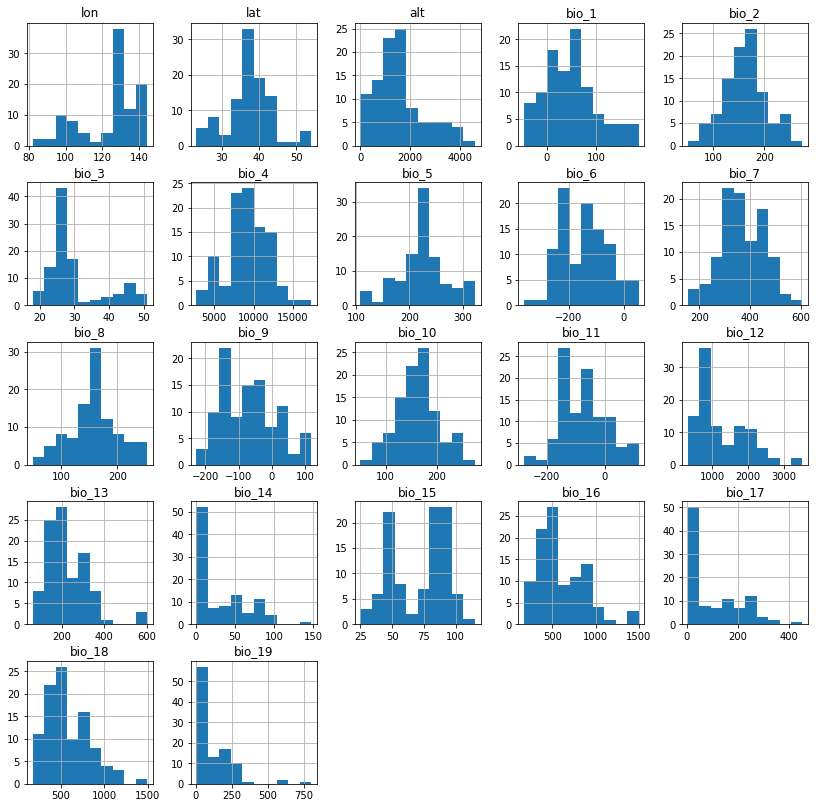

In [398]:
all_bio.iloc[:, 1:].hist();

<AxesSubplot:>

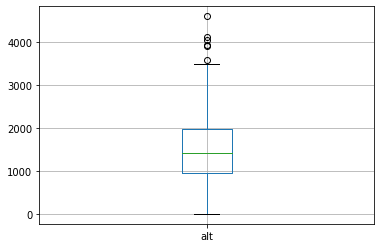

In [35]:
all_bio[['alt']].boxplot()

In [36]:
all_bio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   uid      111 non-null    int64  
 1   speceis  111 non-null    object 
 2   lon      111 non-null    float64
 3   lat      111 non-null    float64
 4   alt      101 non-null    float64
 5   bio_1    101 non-null    float64
 6   bio_2    101 non-null    float64
 7   bio_3    101 non-null    float64
 8   bio_4    101 non-null    float64
 9   bio_5    101 non-null    float64
 10  bio_6    101 non-null    float64
 11  bio_7    101 non-null    float64
 12  bio_8    101 non-null    float64
 13  bio_9    101 non-null    float64
 14  bio_10   101 non-null    float64
 15  bio_11   101 non-null    float64
 16  bio_12   101 non-null    float64
 17  bio_13   101 non-null    float64
 18  bio_14   101 non-null    float64
 19  bio_15   101 non-null    float64
 20  bio_16   101 non-null    float64
 21  bio_17   101 non

In [37]:
all_bio.isnull().sum()

uid         0
speceis     0
lon         0
lat         0
alt        10
bio_1      10
bio_2      10
bio_3      10
bio_4      10
bio_5      10
bio_6      10
bio_7      10
bio_8      10
bio_9      10
bio_10     10
bio_11     10
bio_12     10
bio_13     10
bio_14     10
bio_15     10
bio_16     10
bio_17     10
bio_18     10
bio_19     10
dtype: int64

In [45]:
species_cnt = all_bio.groupby("speceis").size()

<AxesSubplot:xlabel='speceis'>

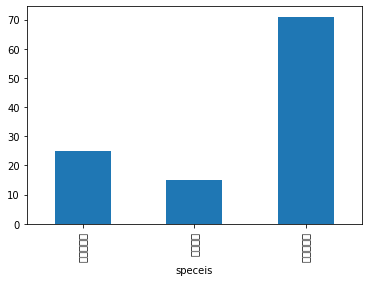

In [47]:
species_cnt.plot(kind='bar')

In [56]:
species_alt = all_bio.groupby("speceis")['bio_1']

speceis
나도범의귀    AxesSubplot(0.125,0.125;0.775x0.755)
세바람꽃     AxesSubplot(0.125,0.125;0.775x0.755)
장백제비꽃    AxesSubplot(0.125,0.125;0.775x0.755)
Name: bio_1, dtype: object

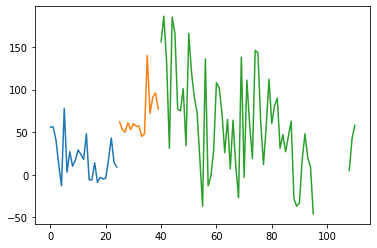

In [57]:
species_alt.plot()

## 백그라운드 포인트의 환경변수값 추출

In [194]:
bg_pt10000 = pd.read_csv("data/background_pt.csv")

In [203]:
bg_pt10000.head()

,x,y,raw,cumulative,Logistic
0,85.104289,41.887622,2.510000e-06,0.270932,3.019090e-04
1,119.062622,32.420955,2.250000e-05,3.365033,2.694573e-03
2,88.045955,23.945955,1.600000e-10,0.000004,1.900000e-08
3,117.620955,29.845955,1.940000e-04,10.188135,2.275907e-02
4,62.362622,53.062622,3.400000e-06,0.435249,4.082210e-04


In [190]:
coords = [(x,y) for x, y in zip(bg_pt10000.x, bg_pt10000.y)]

In [253]:
raster_path=r"G:\maxent_work\env\tif_file"
src=rio.open(os.path.join(raster_path, "alt_overzero.tif"))
print(src.crs)
print(src.count)

EPSG:4326
1


In [192]:
pts = bg_pt10000
pts.index = range(len(bg_pt10000))
# Sample the raster at every point location and store values in DataFrame
pts['Raster Value'] = [x for x in src.sample(coords)]
pts['Raster Value']

0        [918]
1         [52]
2         [24]
3        [280]
4        [213]
         ...  
9995    [2746]
9996     [153]
9997     [302]
9998     [776]
9999     [186]
Name: Raster Value, Length: 10000, dtype: object

<AxesSubplot:>

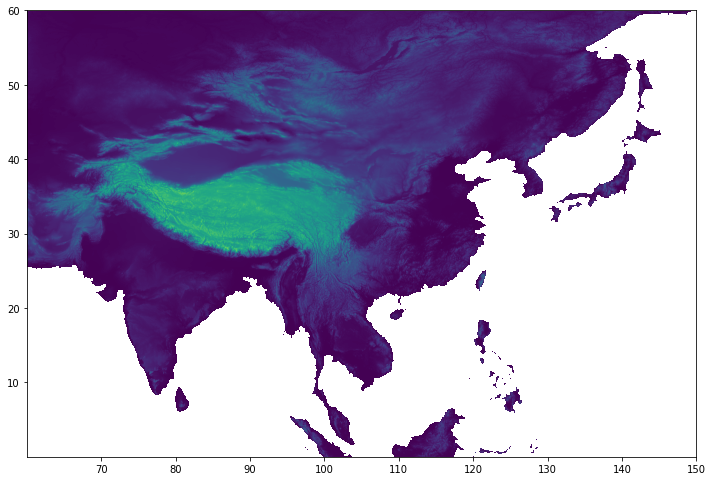

In [261]:
from rasterio.plot import show
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
show(src, ax=ax)

In [165]:
src.close()

In [252]:
tifs = glob(os.path.join(raster_path, "*.tif"))
tifs

['G:\\maxent_work\\env\\tif_file\\alt_overzero.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_01.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_02.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_03.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_04.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_05.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_06.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_07.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_08.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_09.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_10.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_11.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_12.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_13.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_14.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_15.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_16.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_17.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_18.tif',
 'G:\\maxent_work\\env\\tif_file\\bio_19.tif']

In [221]:
bg_layout = bg_pt10000
bg_layout.head()
bg_layout1 = bg_layout.reset_index()
bg_layout1['uid'] = bg_layout.index + 1
bg_layout1

,index,x,y,raw,cumulative,Logistic,uid
0,0,85.104289,41.887622,2.510000e-06,0.270932,3.019090e-04,1
1,1,119.062622,32.420955,2.250000e-05,3.365033,2.694573e-03,2
2,2,88.045955,23.945955,1.600000e-10,0.000004,1.900000e-08,3
3,3,117.620955,29.845955,1.940000e-04,10.188135,2.275907e-02,4
4,4,62.362622,53.062622,3.400000e-06,0.435249,4.082210e-04,5
...,...,...,...,...,...,...,...
9995,9995,100.087622,35.495955,3.200000e-05,4.228693,3.827290e-03,9996
9996,9996,80.762622,54.654289,2.870000e-06,0.336615,3.441540e-04,9997
9997,9997,66.904289,37.029289,6.260000e-08,0.001248,7.517000e-06,9998
9998,9998,68.604289,36.287622,4.270000e-07,0.021426,5.126100e-05,9999


In [222]:
coords = [(x,y) for x, y in zip(bg_layout1.x, bg_layout1.y)]
coords

[(85.10428874, 41.88762207),
 (119.06262209999998, 32.4209554),
 (88.0459554, 23.9459554),
 (117.6209554, 29.8459554),
 (62.36262207, 53.06262207),
 (139.8459554, 37.1709554),
 (84.8709554, 37.10428874),
 (76.28762207, 55.4709554),
 (92.68762207, 35.9709554),
 (125.58762209999999, 39.5959554),
 (87.8709554, 29.520955400000002),
 (119.80428870000001, 59.77928874),
 (63.11262207, 36.3959554),
 (80.07928874, 58.25428874),
 (128.9959554, 45.22928874),
 (88.1209554, 36.25428874),
 (108.0959554, 47.12928874),
 (82.98762207, 22.30428874),
 (135.1876221, 54.06262207),
 (77.92928874, 45.8709554),
 (123.1126221, 57.82928874),
 (81.71262207, 38.73762207),
 (114.5709554, 23.8209554),
 (70.7459554, 34.23762207),
 (71.27928874, 50.75428874),
 (130.6709554, 32.8209554),
 (98.6959554, 19.78762207),
 (69.07928874, 25.58762207),
 (121.56262209999998, 49.2209554),
 (94.02928874, 52.12928874),
 (132.6042887, 55.88762207),
 (71.22928874, 36.5959554),
 (131.2626221, 55.31262207),
 (95.80428874, 19.26262207)

In [280]:
bio_var=pd.DataFrame(columns=['rvar'])
i=0
start = time.time()
for tif in tqdm(tifs):        
    bio_tif = rio.open(tif)
    bio_var['bio' + str(i)] = [x for x in bio_tif.sample(coords)]
    bio_var['bio' + str(i)] = bio_var['bio' + str(i)].apply(lambda x: float(x))    
    i+=1
    bio_tif.close()
    
print(f"작업에 걸린시간은 {time.time()-start} 초 입니다.")

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [08:17<00:00, 24.88s/it]


In [378]:
if 'rval' in bio_var.columns:
    bio_var = bio_var.drop('rvar', axis=1)

In [379]:
if 'bio0' in bio_var.columns:
    bio_var.rename(columns = {'bio0':'alt'}, inplace = True) 

In [380]:
bio_var.head()

,alt,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,918.0,108.0,247.0,27.0,12015.0,322.0,-138.0,460.0,247.0,-43.0,247.0,-62.0,67.0,15.0,1.0,83.0,40.0,4.0,40.0,4.0
1,52.0,152.0,267.0,24.0,9154.0,317.0,-18.0,335.0,267.0,33.0,267.0,33.0,979.0,204.0,30.0,61.0,464.0,104.0,464.0,104.0
2,24.0,264.0,306.0,42.0,4234.0,380.0,117.0,263.0,295.0,199.0,306.0,199.0,1424.0,446.0,1.0,118.0,1005.0,22.0,320.0,22.0
3,280.0,159.0,262.0,24.0,8382.0,315.0,-2.0,317.0,199.0,67.0,262.0,47.0,1669.0,287.0,47.0,54.0,748.0,167.0,594.0,205.0
4,213.0,28.0,193.0,22.0,13614.0,271.0,-210.0,481.0,193.0,-137.0,193.0,-151.0,341.0,59.0,13.0,44.0,140.0,43.0,140.0,52.0


In [381]:
bio_var.describe()

,alt,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000,10000.00000
mean,1063.479200,77.943000,200.6177,32.752400,10029.96670,274.001400,-129.177000,403.178400,175.032600,-16.286800,200.6177,-57.049900,711.9744,145.066300,13.357900,79.162400,372.633000,49.1193,273.09800,76.77670
std,1317.054736,113.833984,74.2287,14.350097,4611.59785,74.586989,171.616356,131.394657,76.093057,182.026523,74.2287,167.514995,721.4917,145.384291,28.122228,30.422094,373.048701,93.8033,252.82789,167.24367
min,0.000000,-154.000000,-19.0000,16.000000,126.00000,32.000000,-460.000000,75.000000,-111.000000,-376.000000,-19.0000,-388.000000,13.0000,5.000000,0.000000,9.000000,11.000000,0.0000,0.00000,0.00000
25%,194.000000,-13.000000,151.0000,23.000000,6836.25000,233.000000,-253.000000,315.000000,128.000000,-161.000000,151.0000,-180.000000,256.0000,55.000000,2.000000,53.000000,135.000000,8.0000,102.00000,13.00000
50%,566.000000,49.000000,197.0000,27.000000,10794.50000,269.000000,-182.000000,426.000000,176.000000,-80.000000,197.0000,-102.000000,463.0000,95.000000,5.000000,82.000000,244.000000,23.0000,210.50000,38.00000
75%,1282.000000,170.000000,262.0000,40.000000,13560.25000,324.250000,14.000000,494.000000,237.250000,184.000000,262.0000,73.000000,896.2500,195.000000,13.000000,102.000000,490.000000,48.0000,357.00000,65.00000
max,6220.000000,291.000000,371.0000,94.000000,20932.00000,461.000000,238.000000,691.000000,371.000000,357.000000,371.0000,271.000000,5249.0000,1721.000000,273.000000,166.000000,3904.000000,873.0000,2728.00000,3298.00000


In [382]:
time.time()-current_sec

302.50841784477234

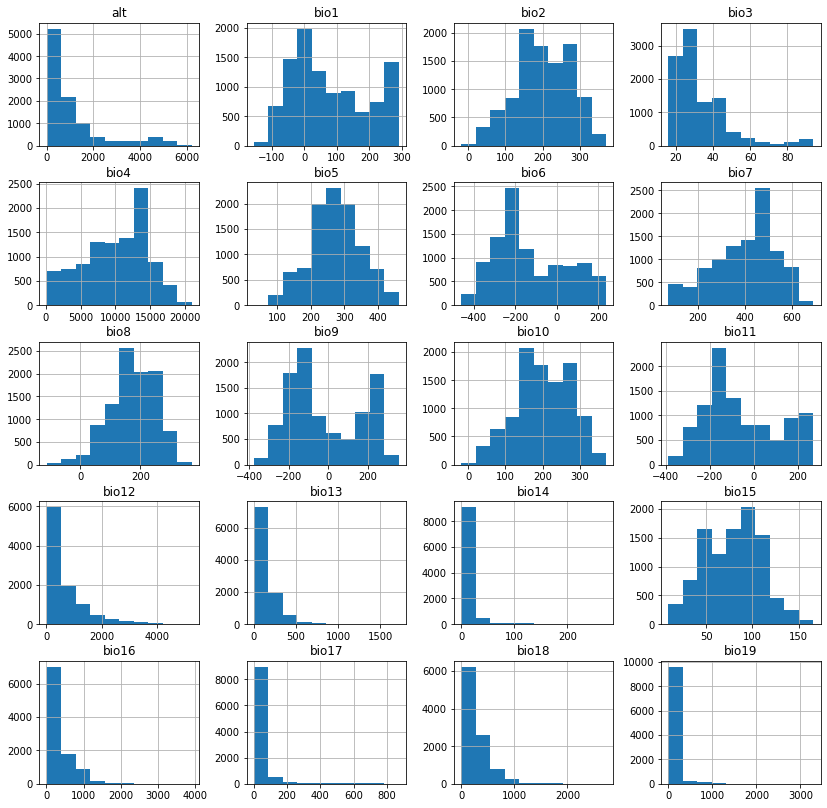

In [387]:
bio_var.hist();

### BioClimate 변수 

- BIO1 = Annual Mean Temperature
- BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))
- BIO3 = Isothermality (BIO2/BIO7) (×100)
- BIO4 = Temperature Seasonality (standard deviation ×100)
- BIO5 = Max Temperature of Warmest Month
- BIO6 = Min Temperature of Coldest Month
- BIO7 = Temperature Annual Range (BIO5-BIO6)
- BIO8 = Mean Temperature of Wettest Quarter
- BIO9 = Mean Temperature of Driest Quarter
- BIO10 = Mean Temperature of Warmest Quarter
- BIO11 = Mean Temperature of Coldest Quarter
- BIO12 = Annual Precipitation
- BIO13 = Precipitation of Wettest Month
- BIO14 = Precipitation of Driest Month
- B1O15 = Precipitation Seasonality (Coefficient of Variation)
- BIO16 = Precipitation of Wettest Quarter
- BIO17 = Precipitation of Driest Quarter
- BIO18 = Precipitation of Warmest Quarter
- BIO19 = Precipitation of Coldest Quarter
'''


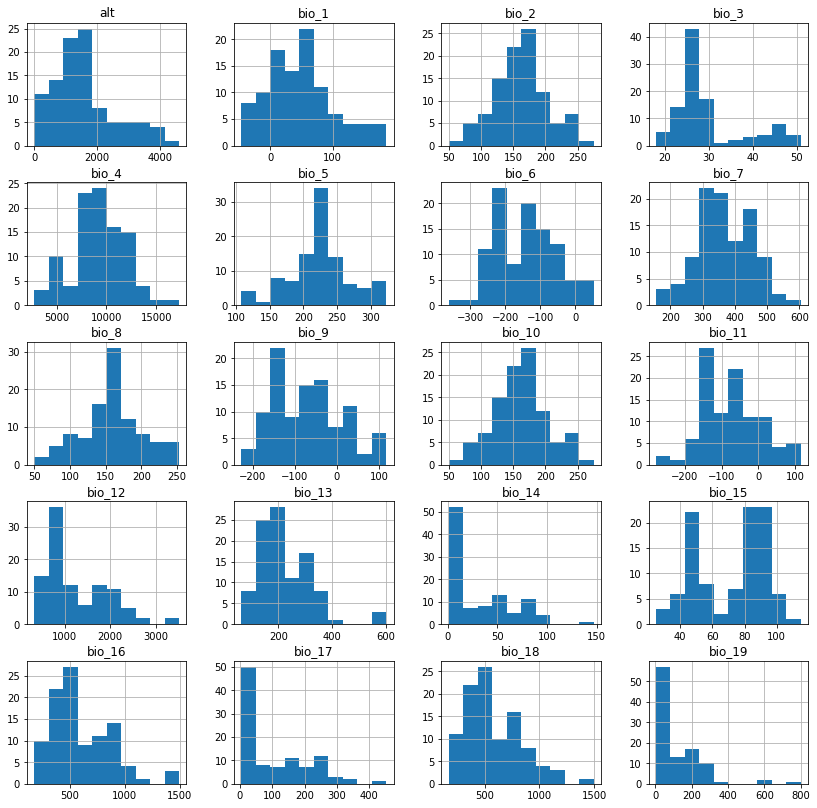

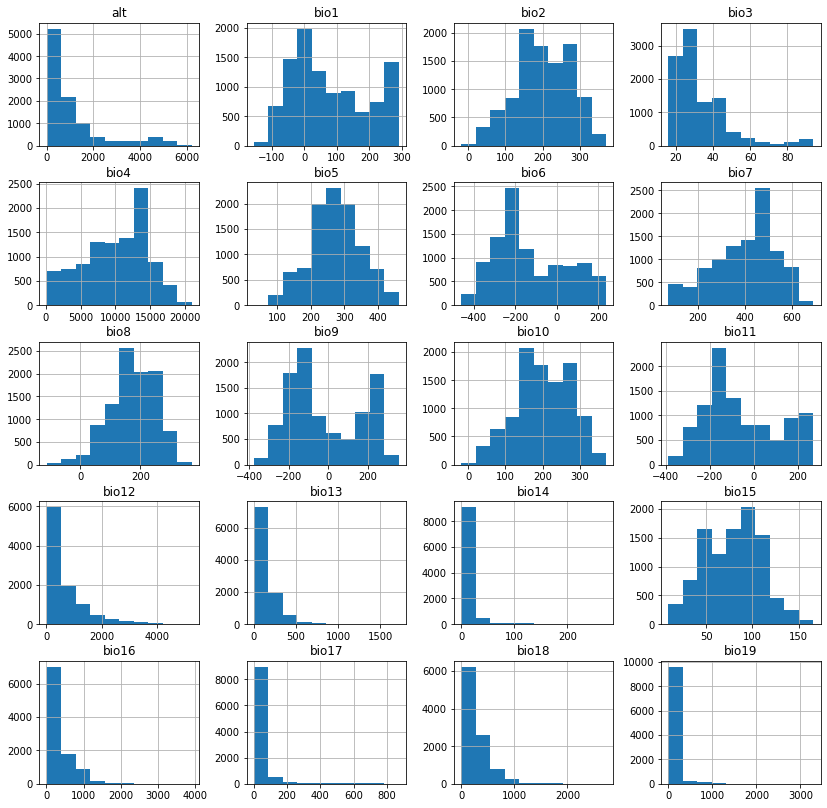

In [404]:
all_bio.iloc[:, 4:].hist();
bio_var.hist();

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

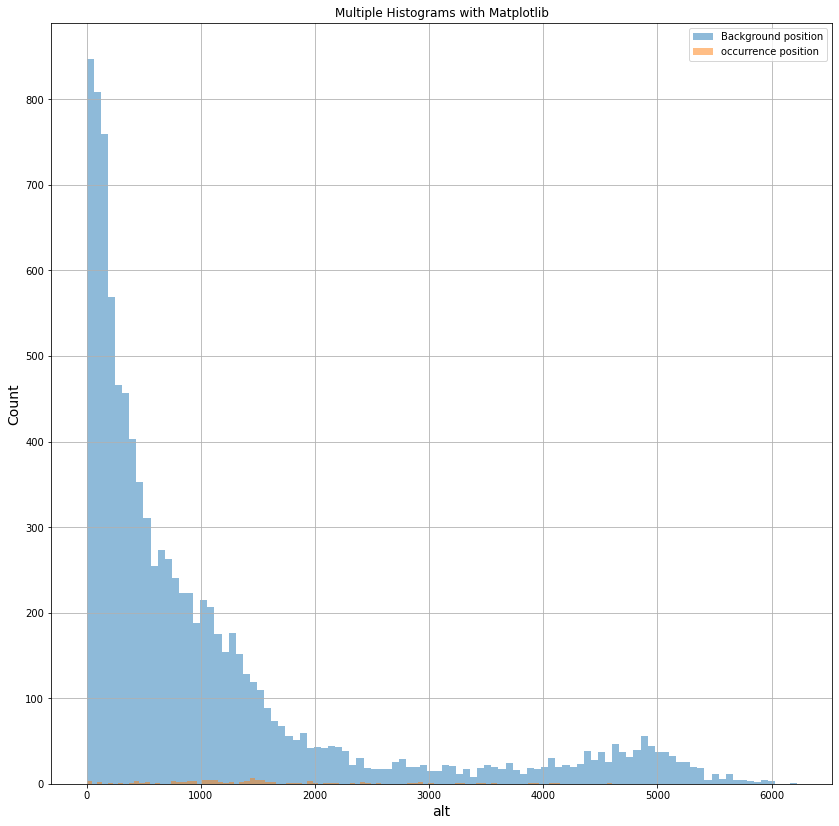

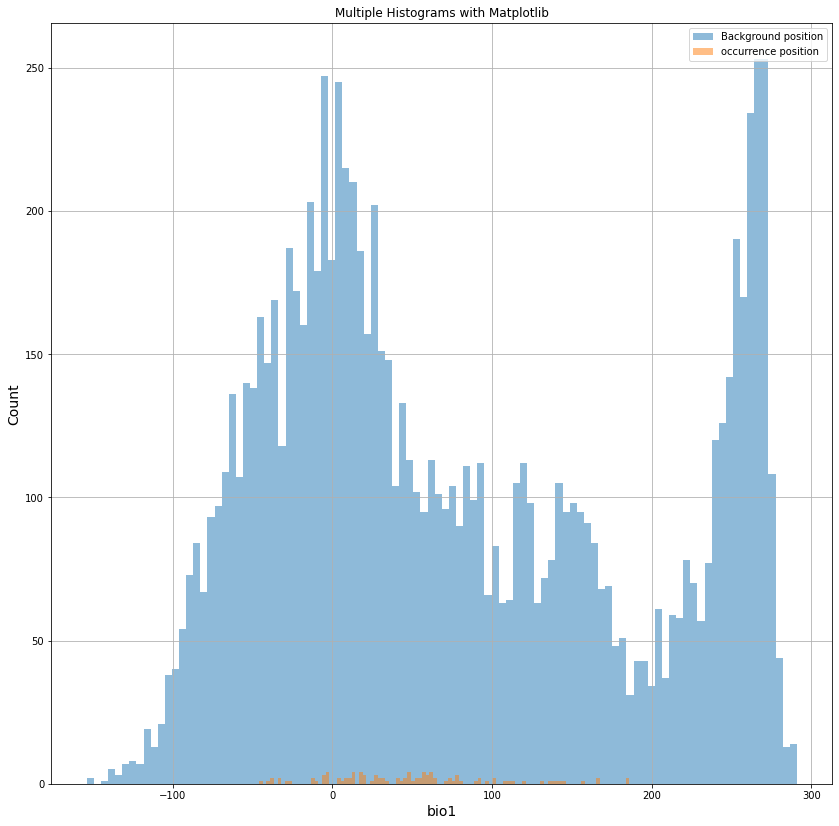

  5%|████▎                                                                              | 1/19 [00:01<00:27,  1.51s/it]

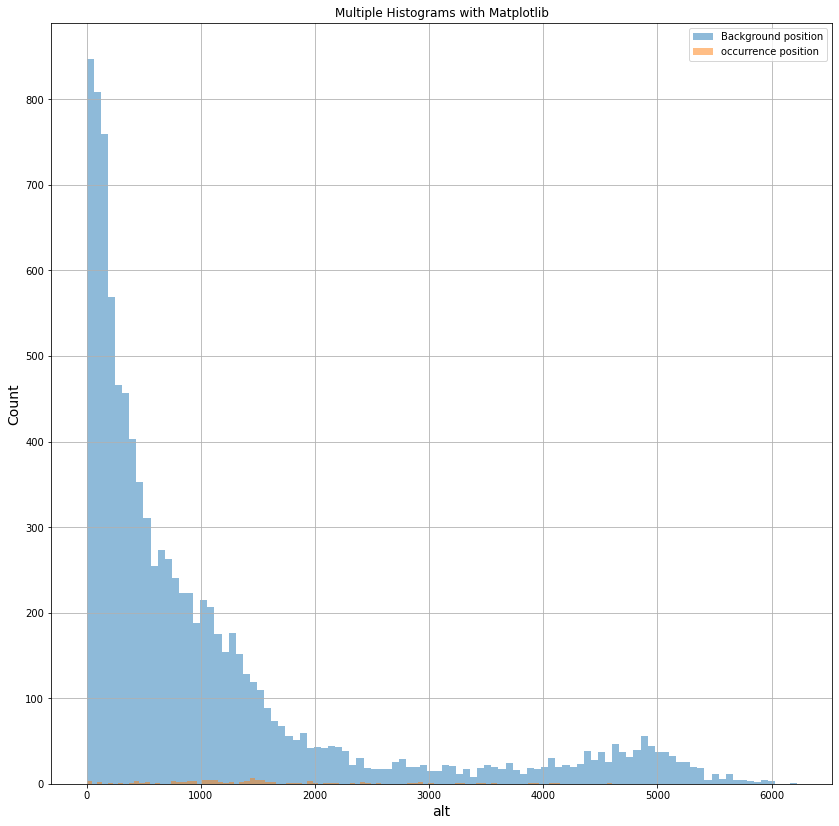

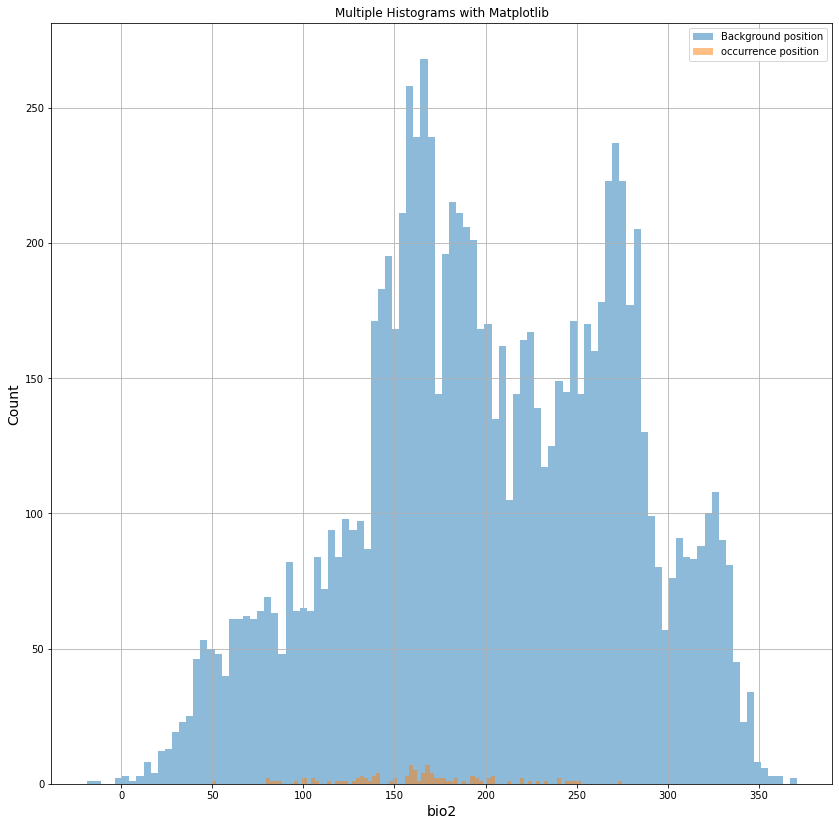

 11%|████████▋                                                                          | 2/19 [00:03<00:25,  1.51s/it]

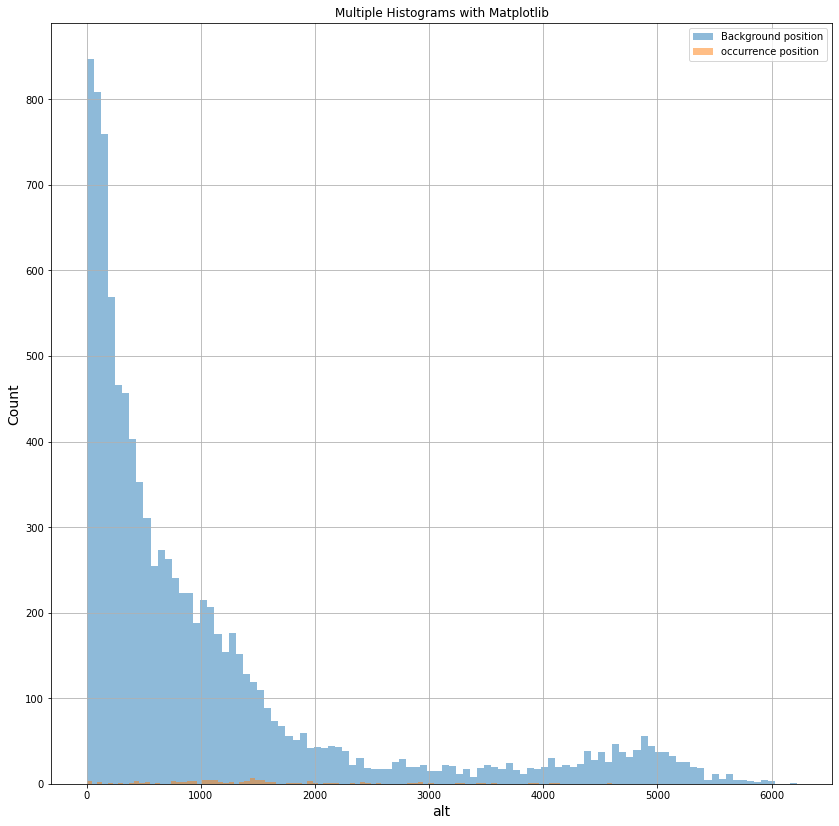

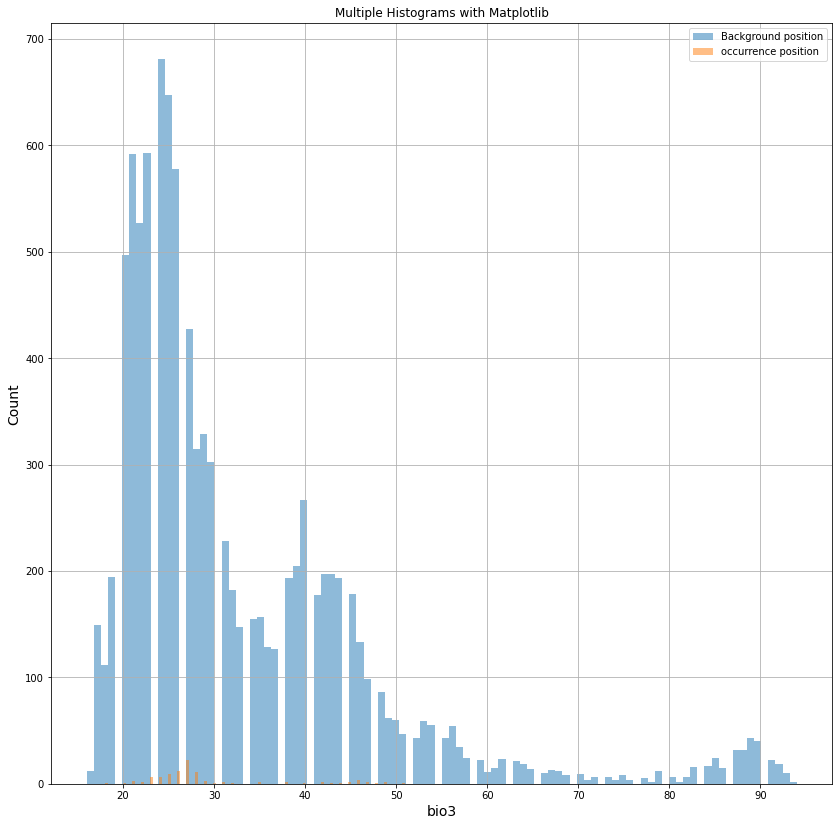

 16%|█████████████                                                                      | 3/19 [00:05<00:26,  1.66s/it]

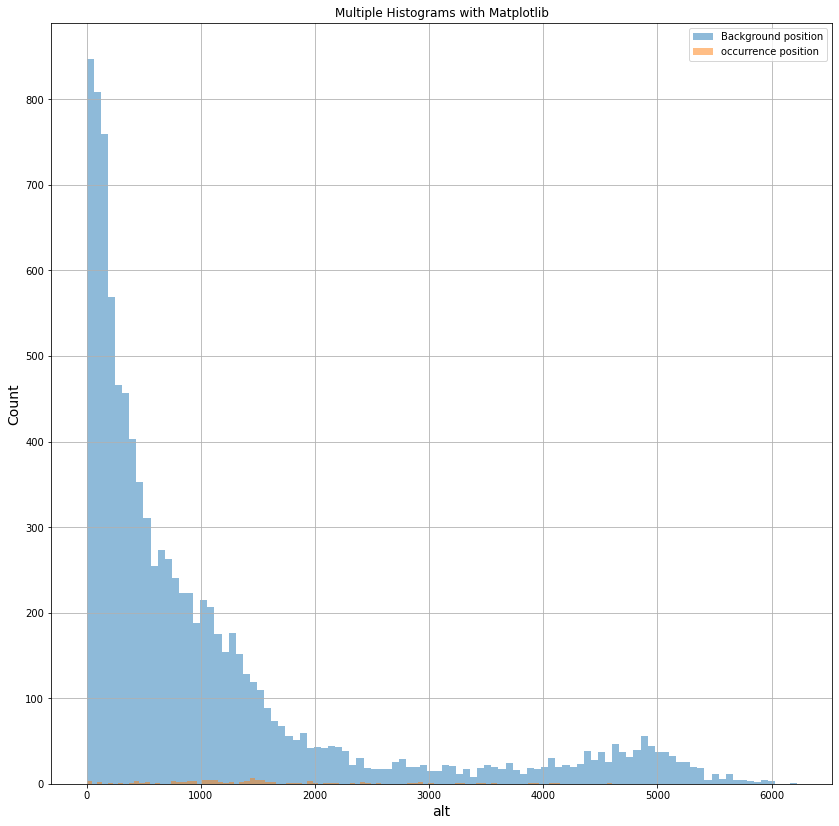

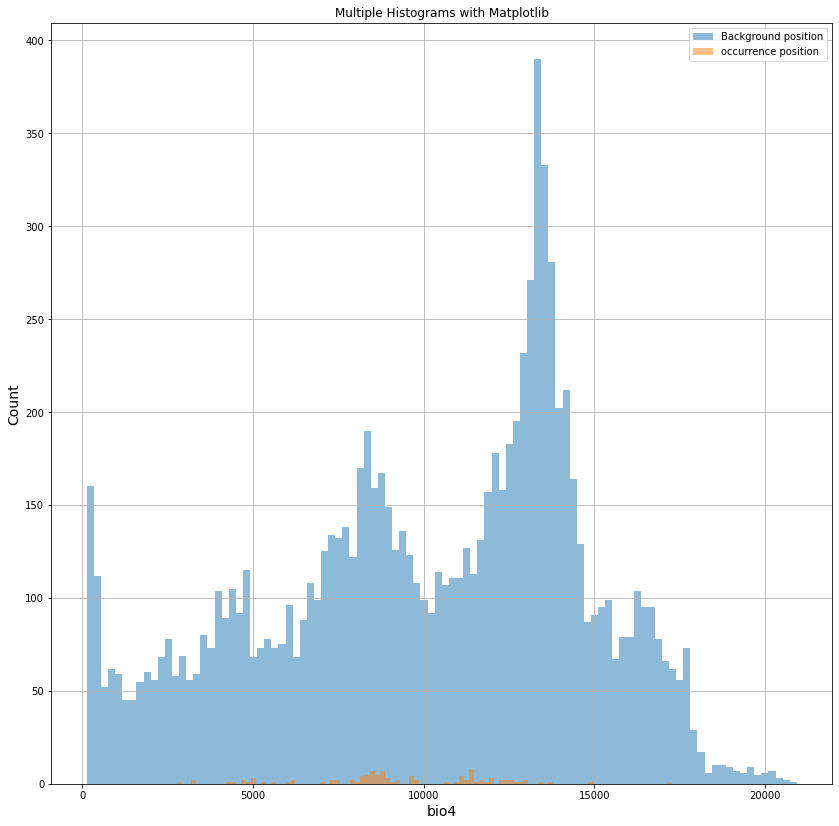

 21%|█████████████████▍                                                                 | 4/19 [00:06<00:24,  1.62s/it]

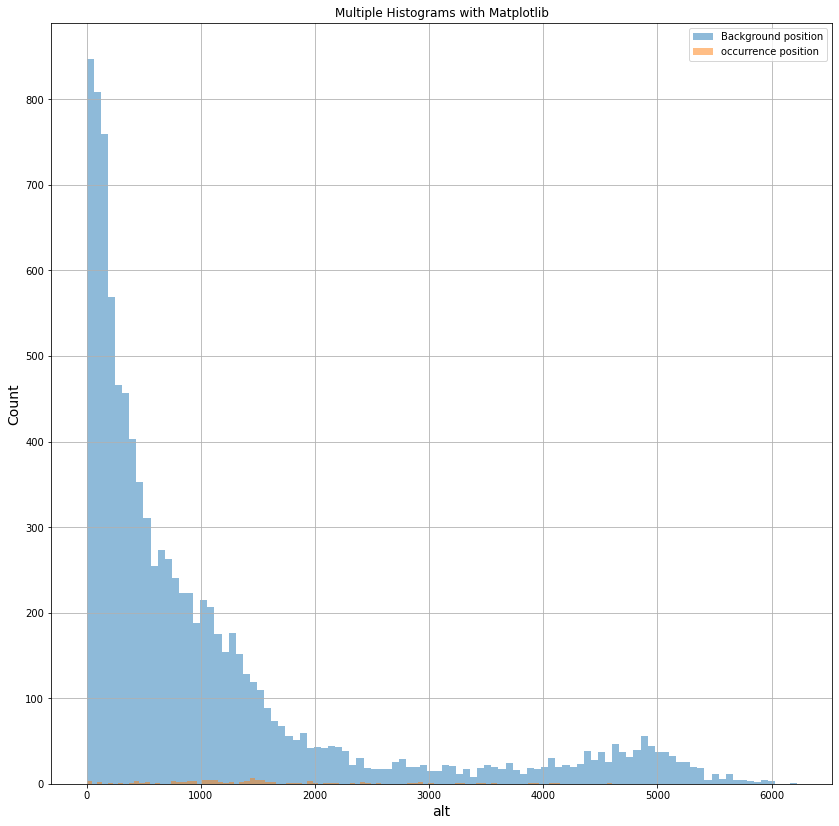

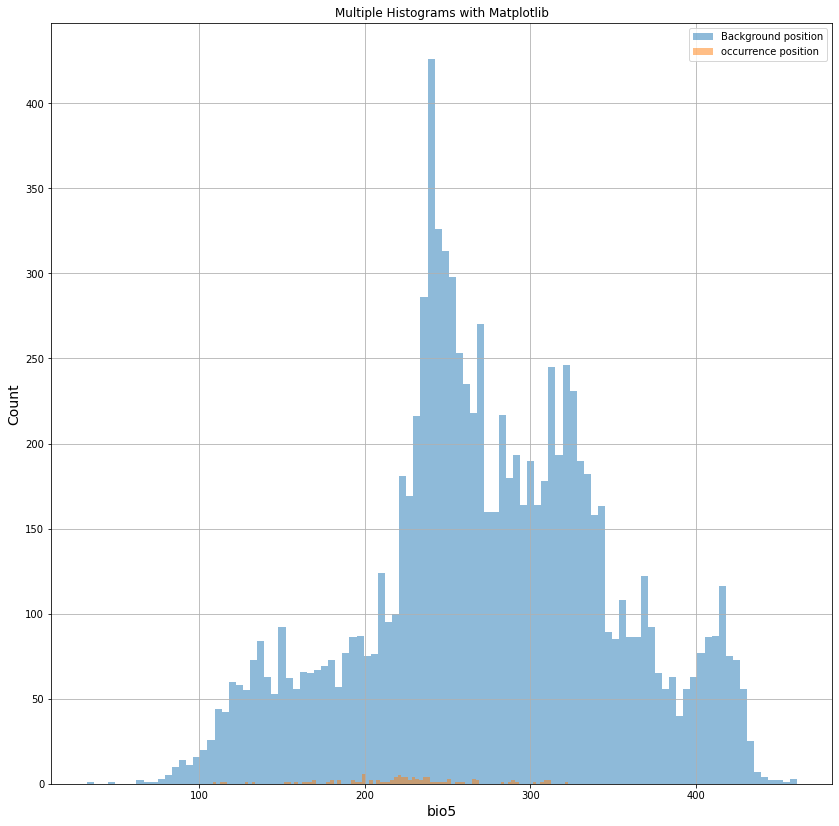

 26%|█████████████████████▊                                                             | 5/19 [00:08<00:22,  1.58s/it]

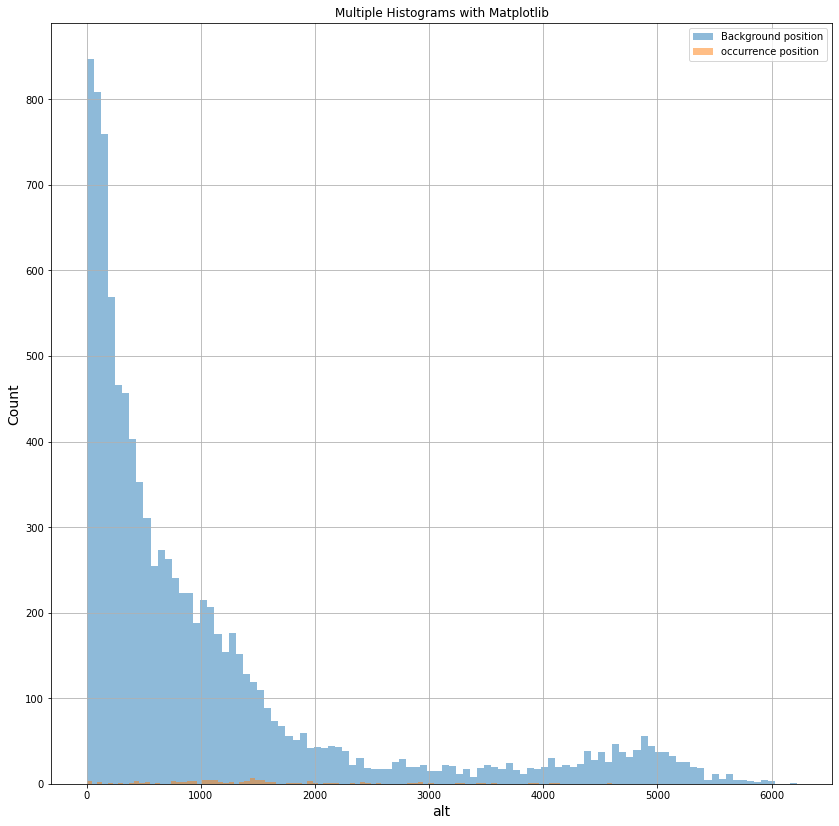

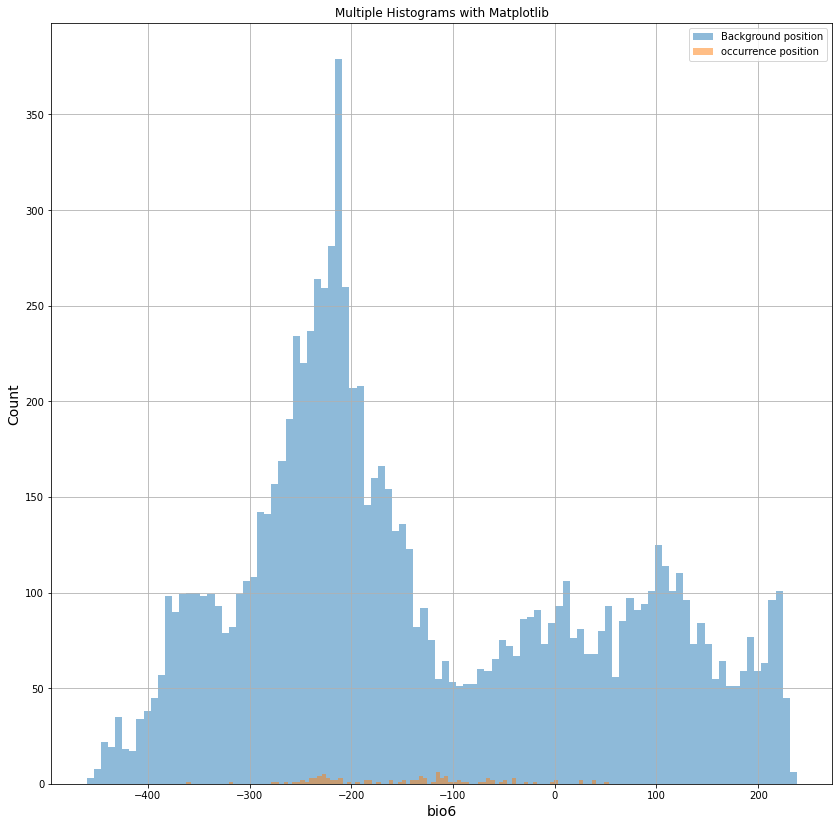

 32%|██████████████████████████▏                                                        | 6/19 [00:09<00:20,  1.56s/it]

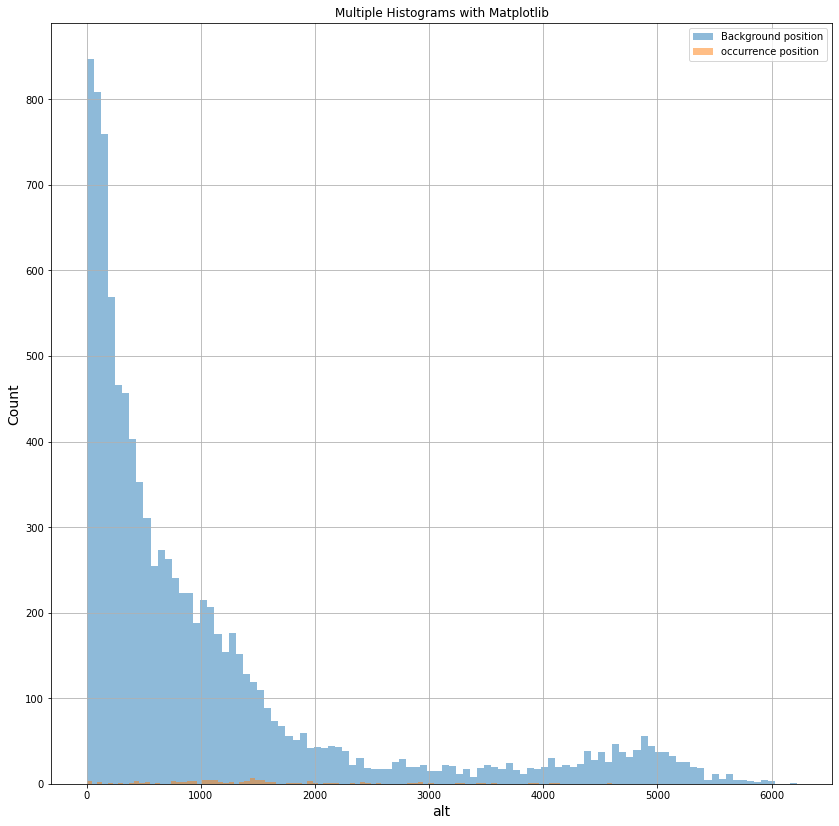

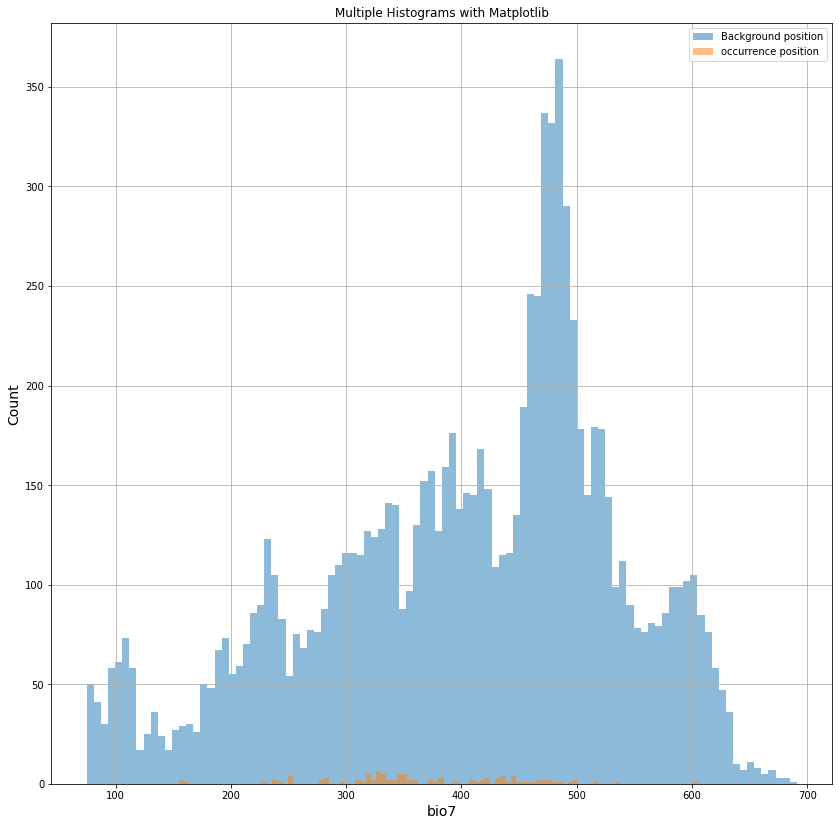

 37%|██████████████████████████████▌                                                    | 7/19 [00:11<00:20,  1.68s/it]

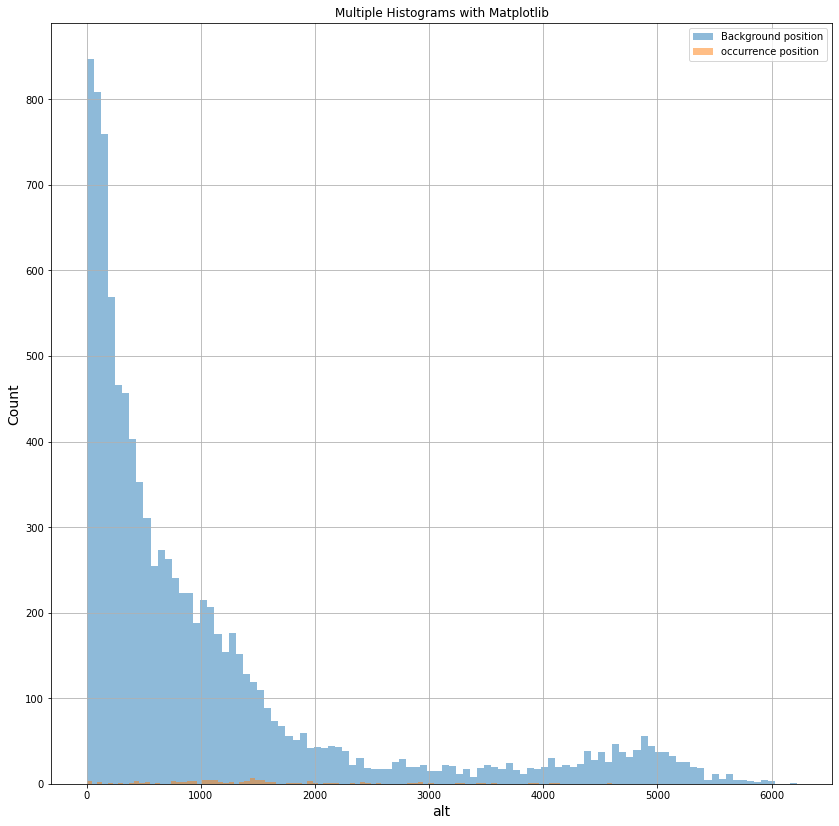

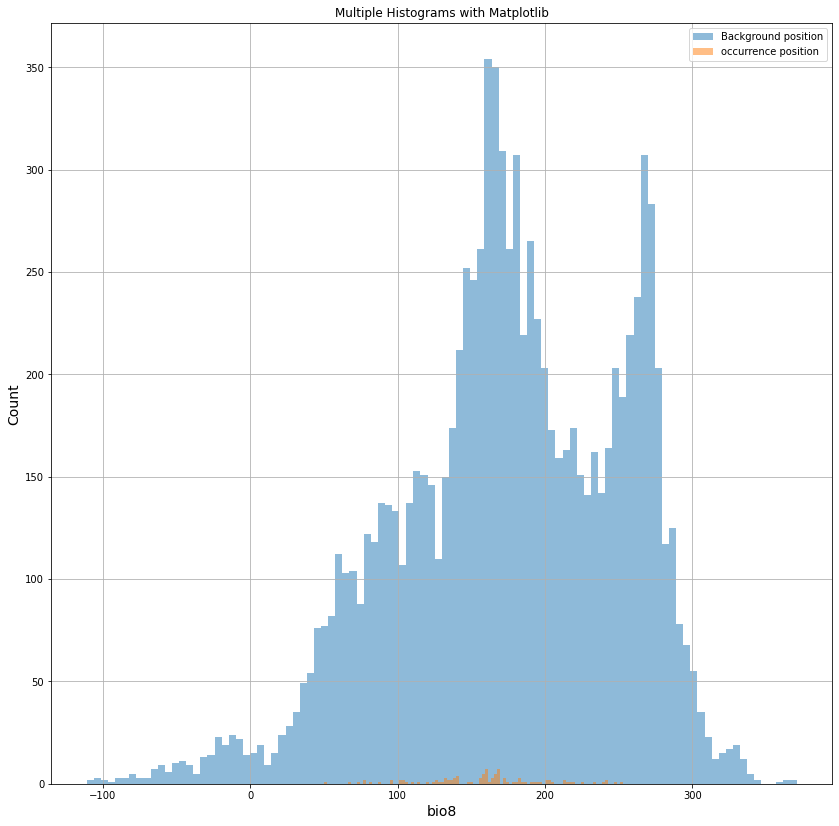

 42%|██████████████████████████████████▉                                                | 8/19 [00:13<00:18,  1.65s/it]

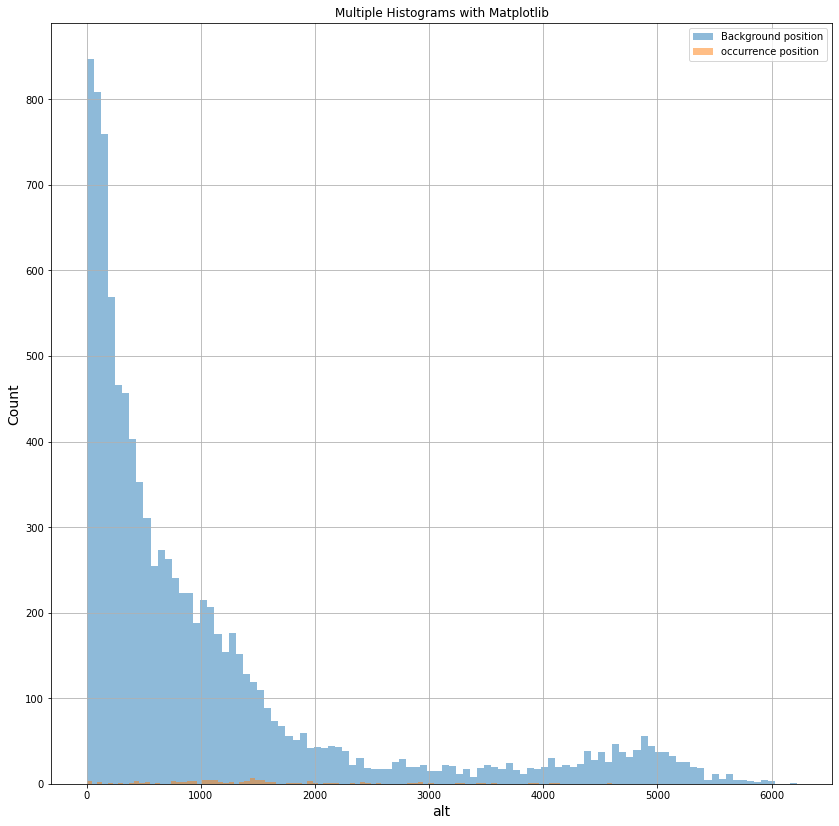

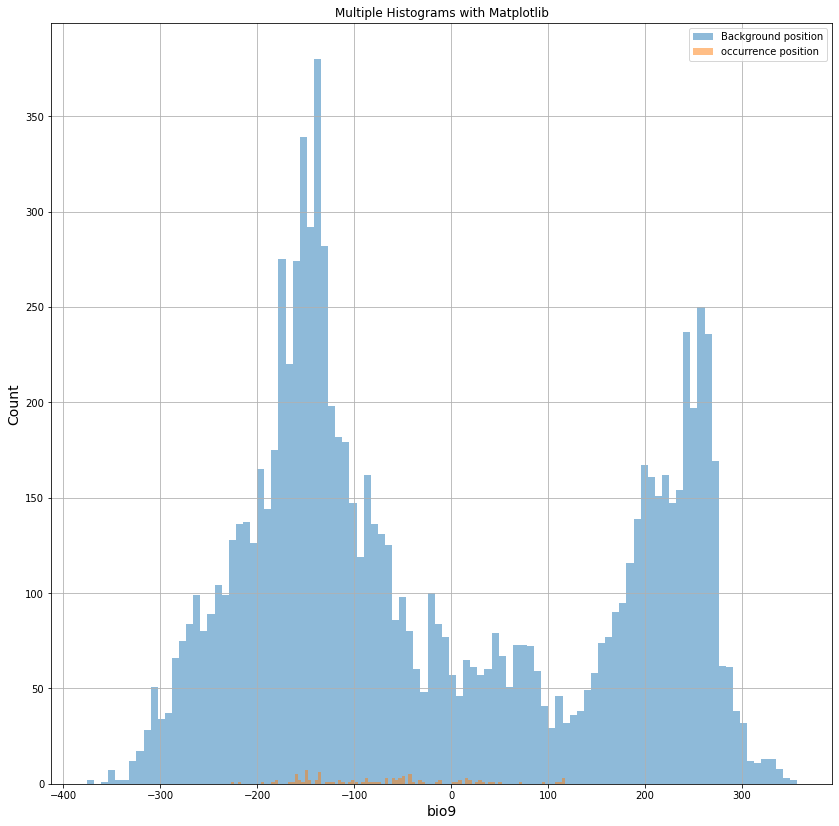

 47%|███████████████████████████████████████▎                                           | 9/19 [00:14<00:16,  1.60s/it]

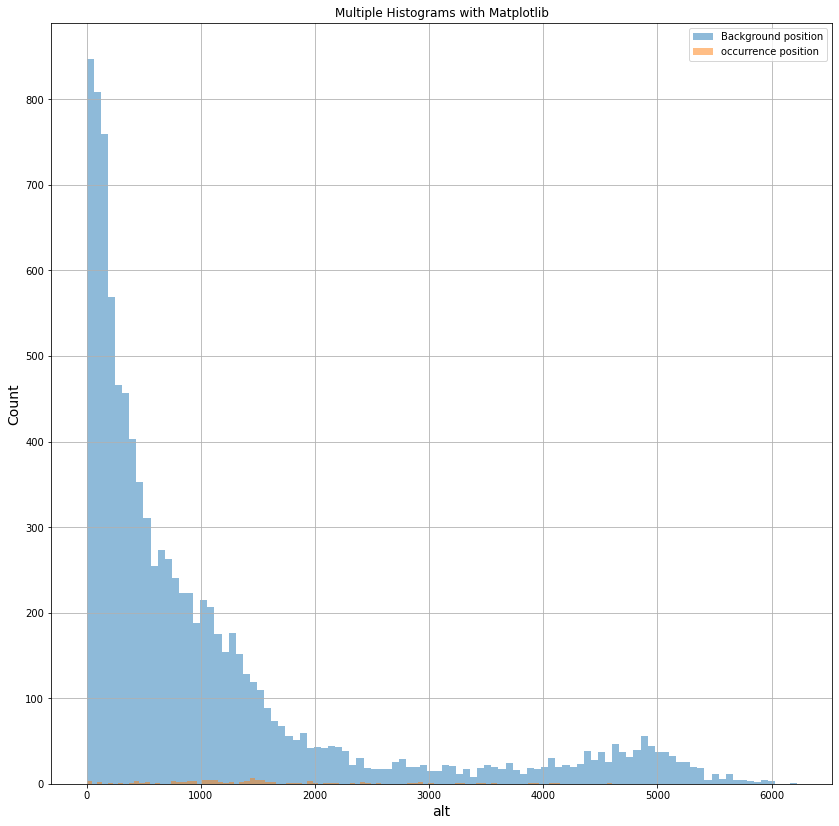

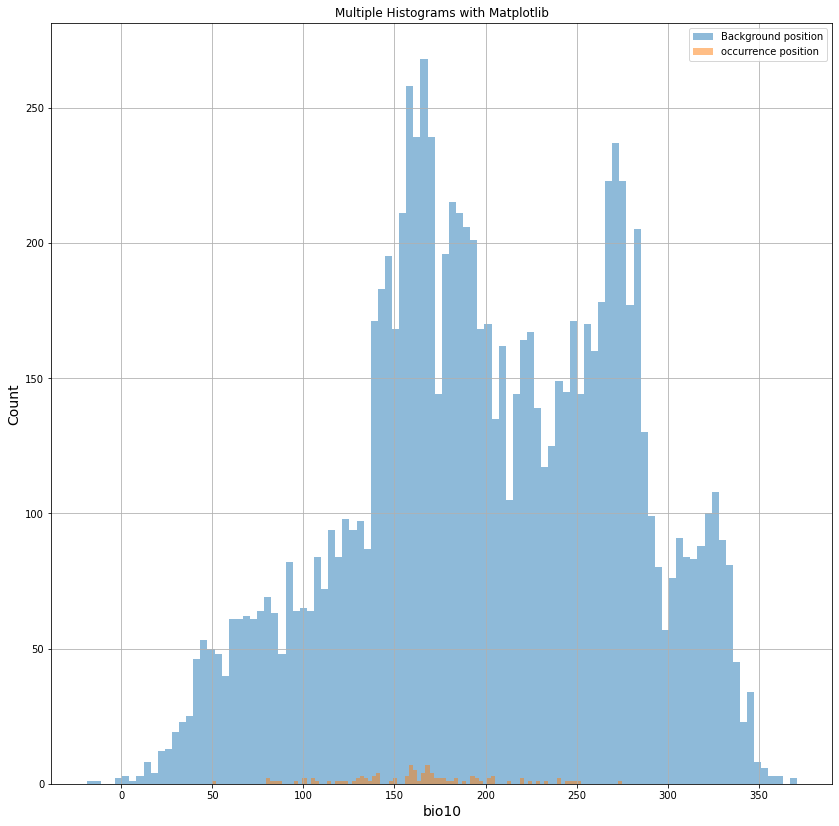

 53%|███████████████████████████████████████████▏                                      | 10/19 [00:16<00:14,  1.56s/it]

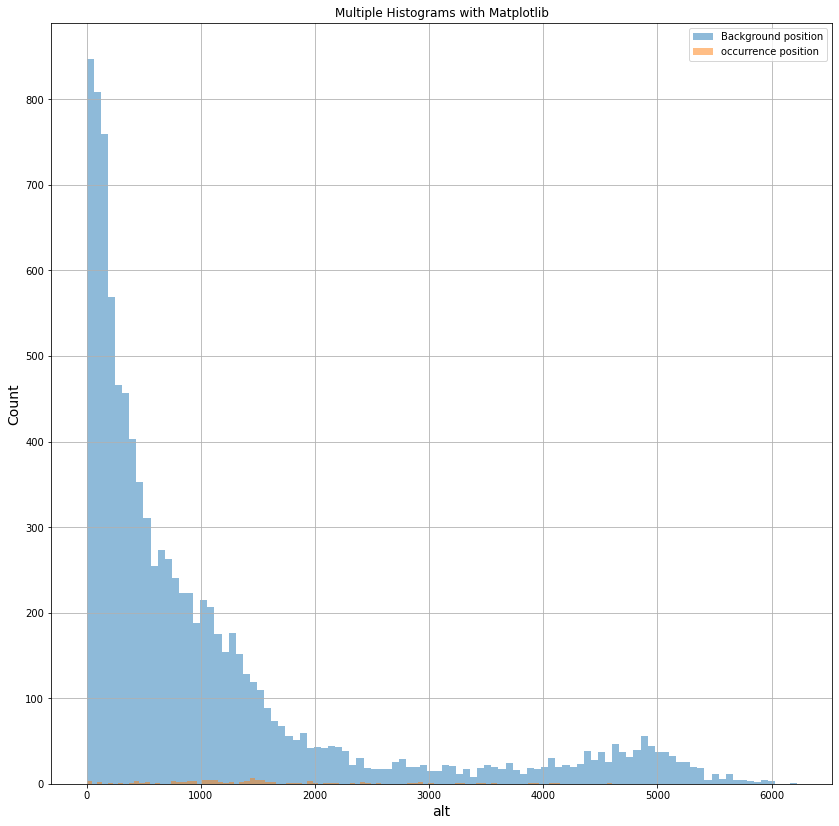

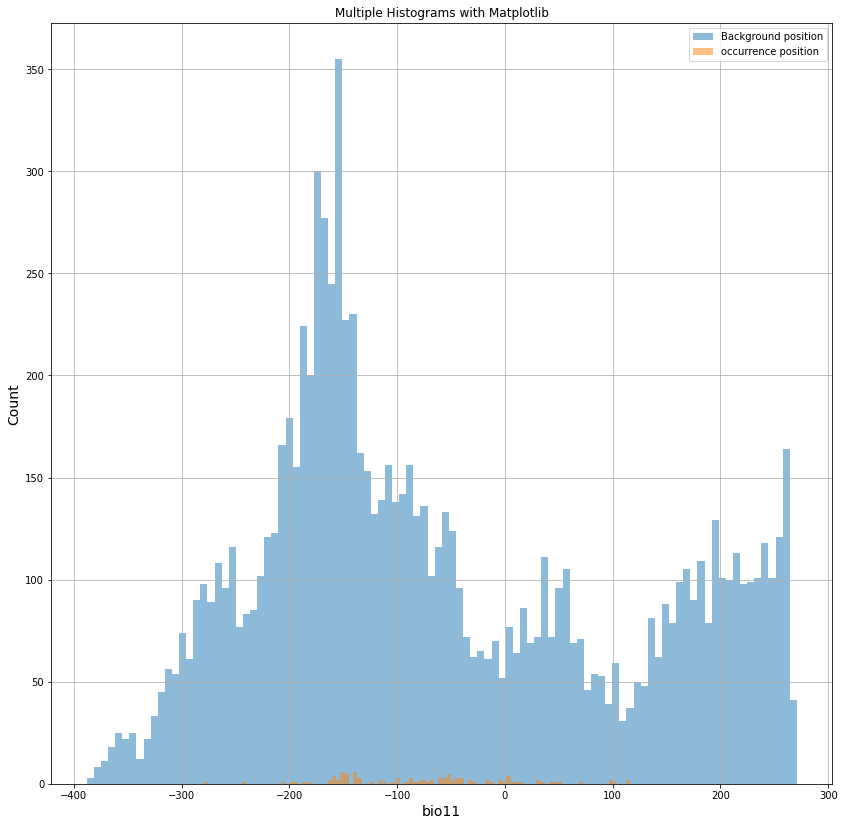

 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:17<00:12,  1.55s/it]

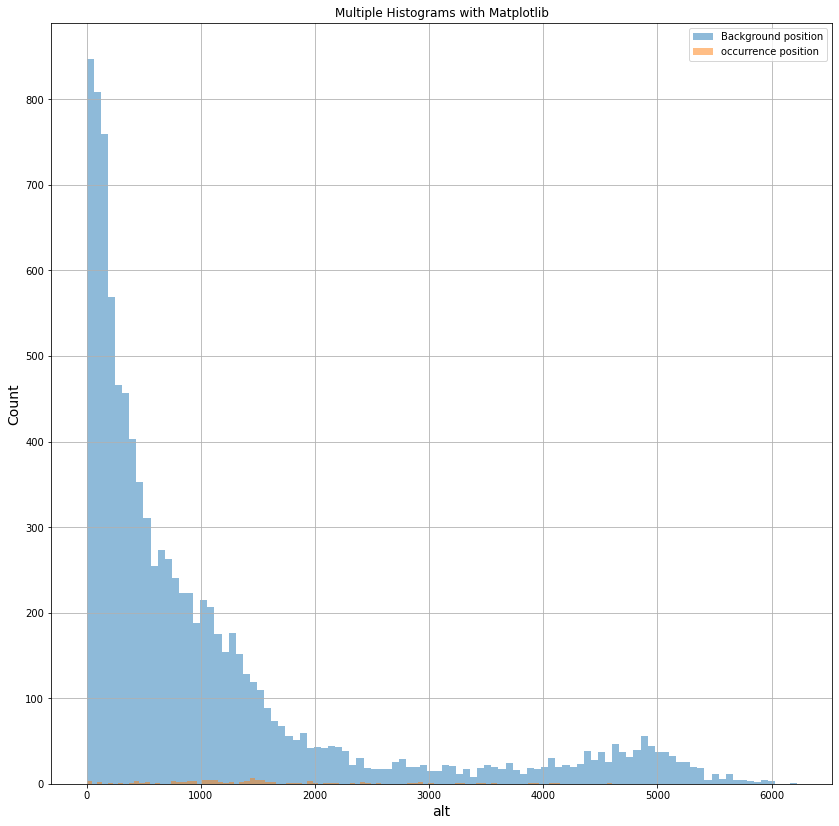

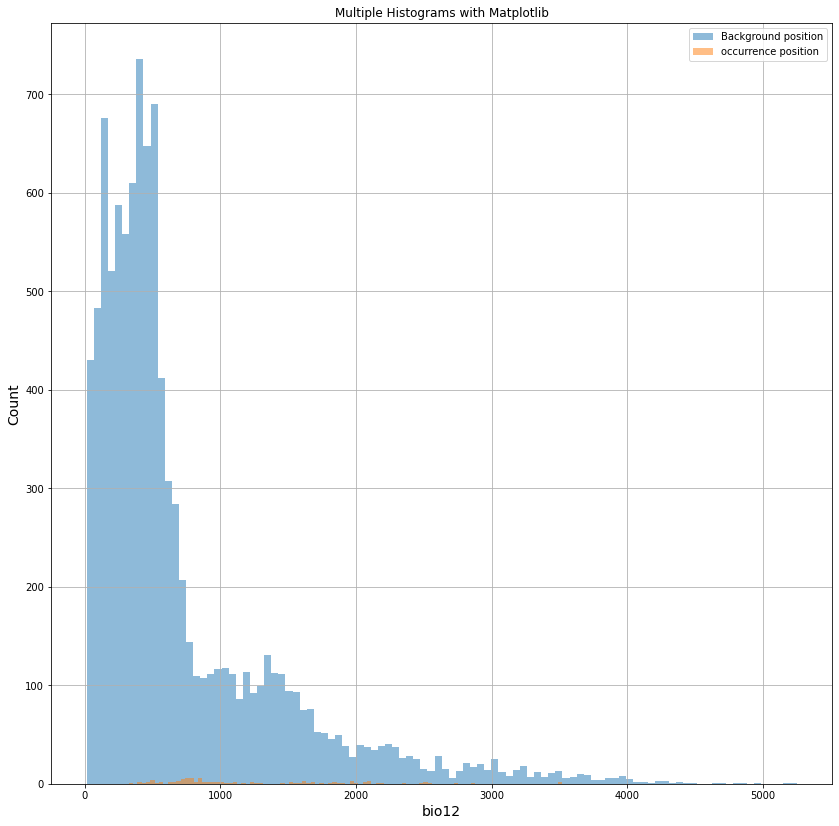

 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:19<00:11,  1.69s/it]

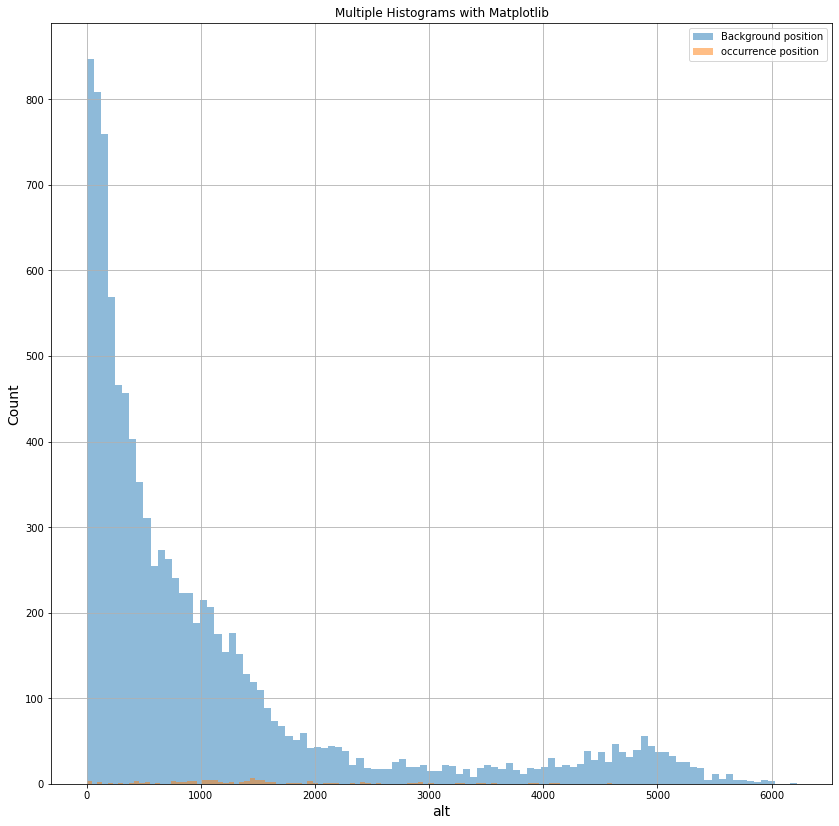

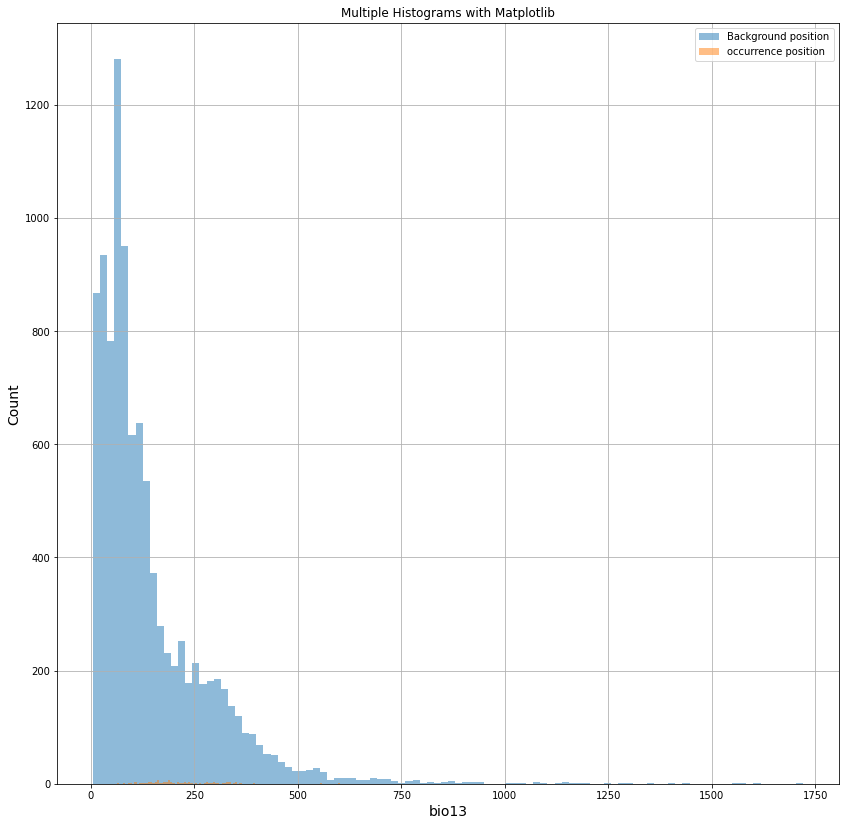

 68%|████████████████████████████████████████████████████████                          | 13/19 [00:21<00:09,  1.64s/it]

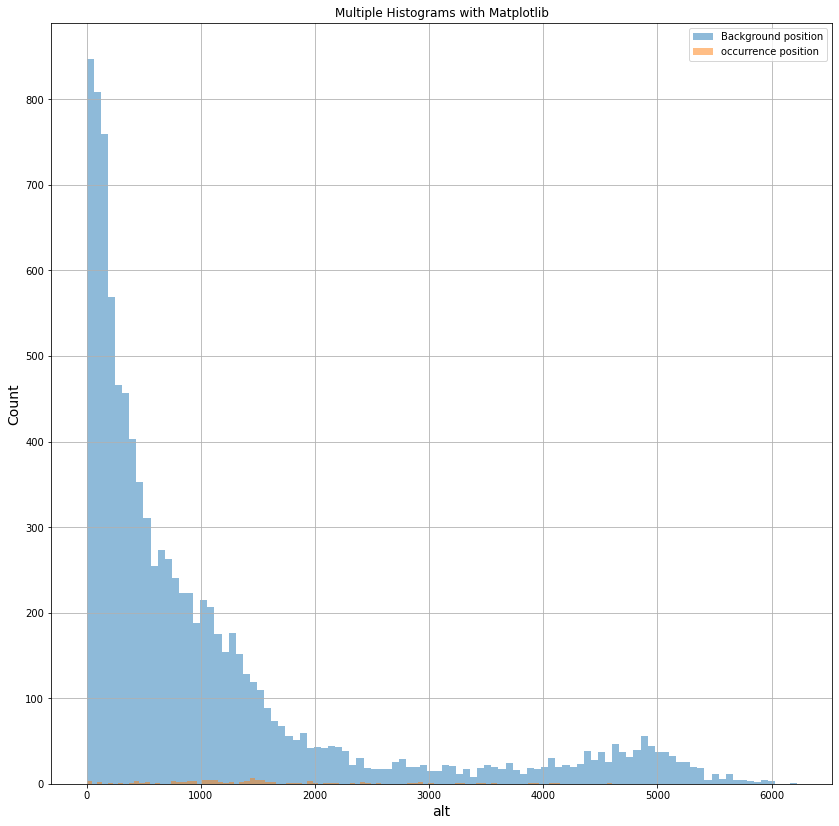

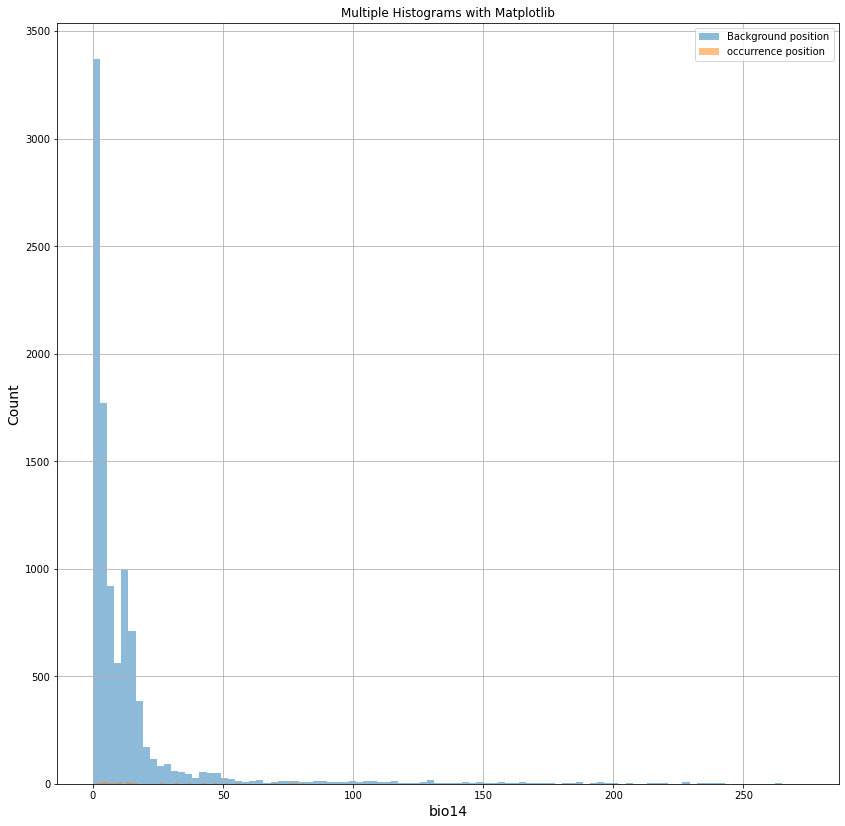

 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:22<00:07,  1.54s/it]

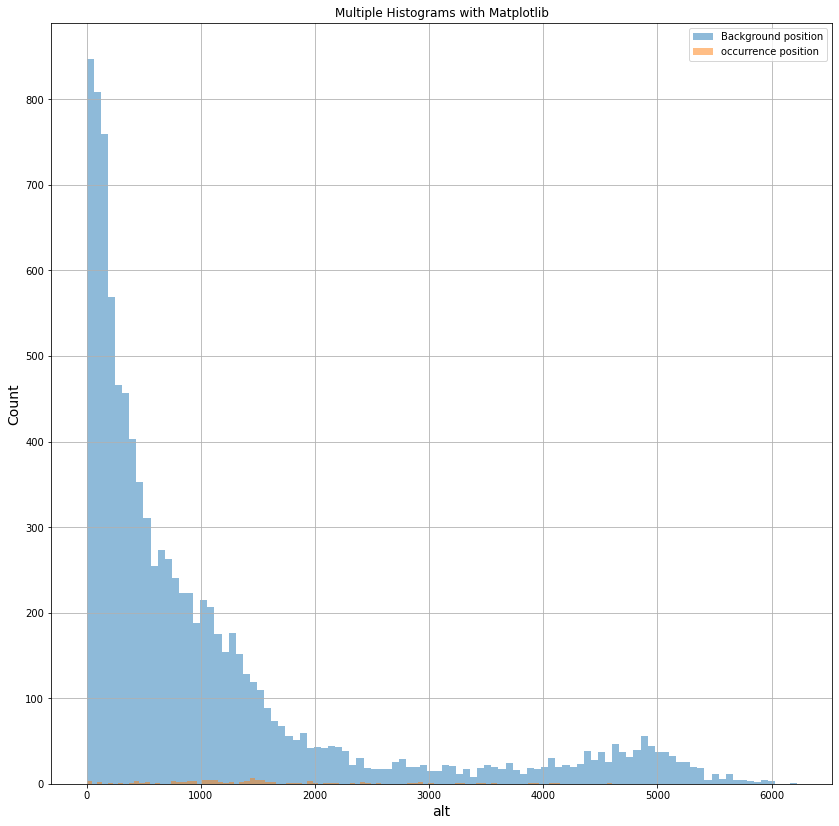

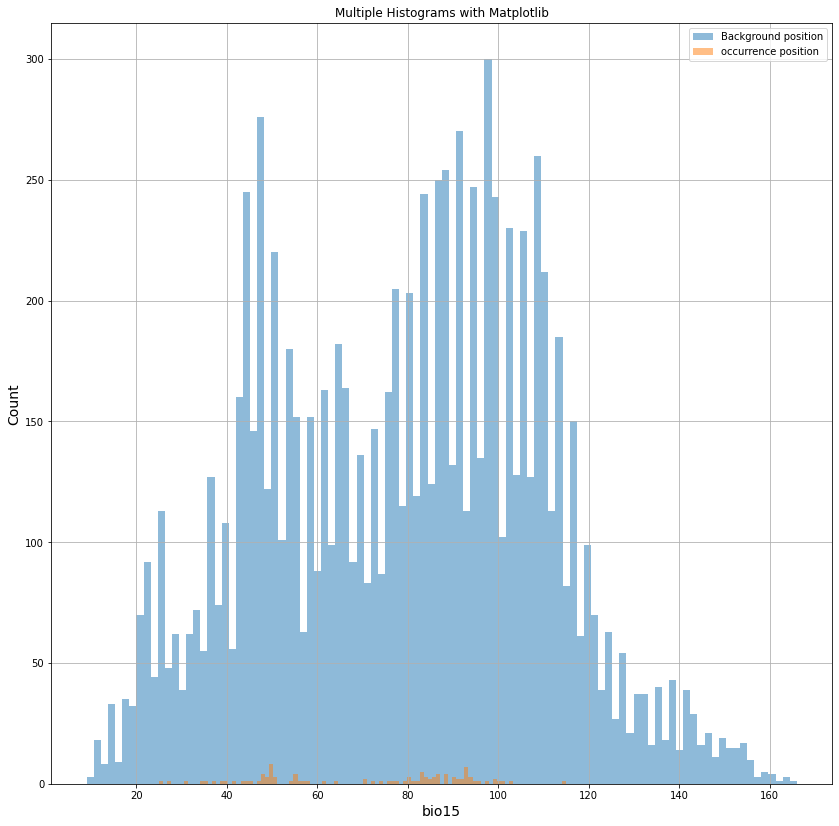

 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:23<00:05,  1.46s/it]

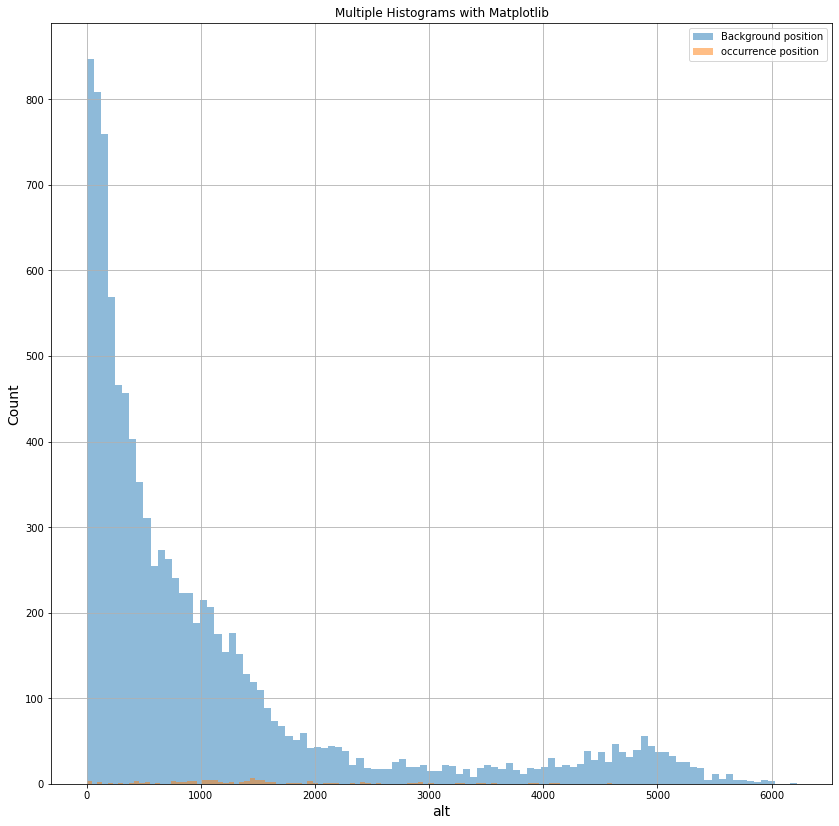

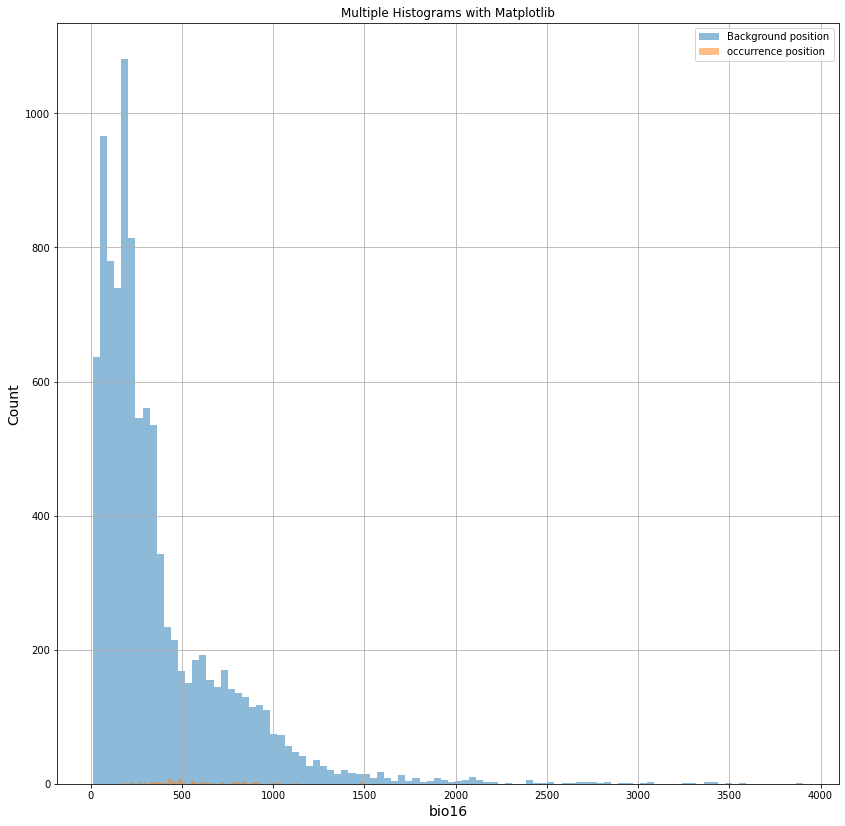

 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:25<00:04,  1.56s/it]

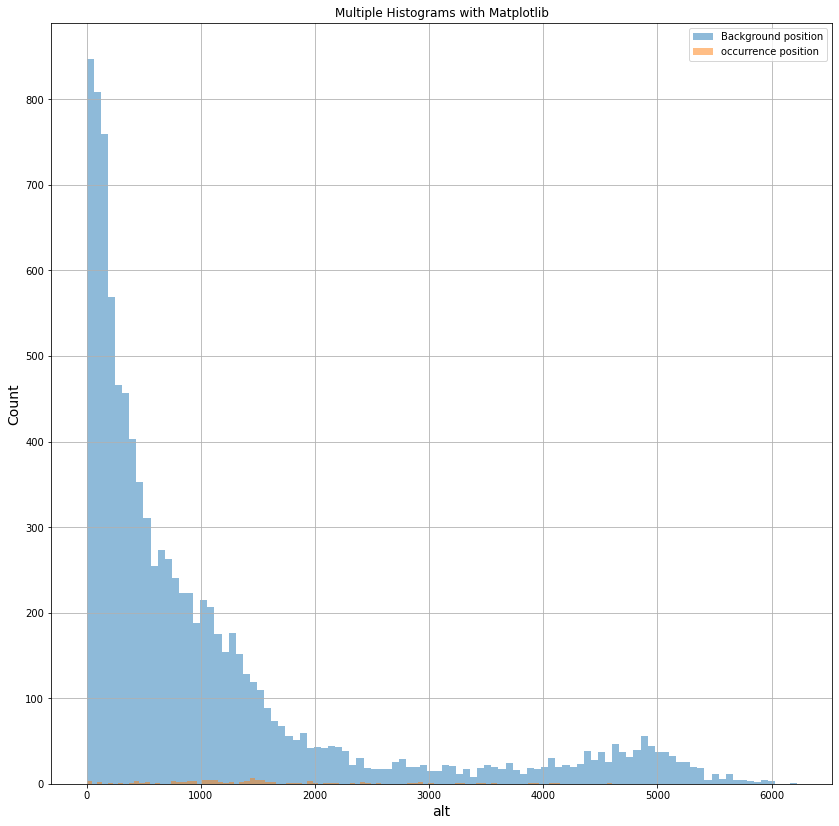

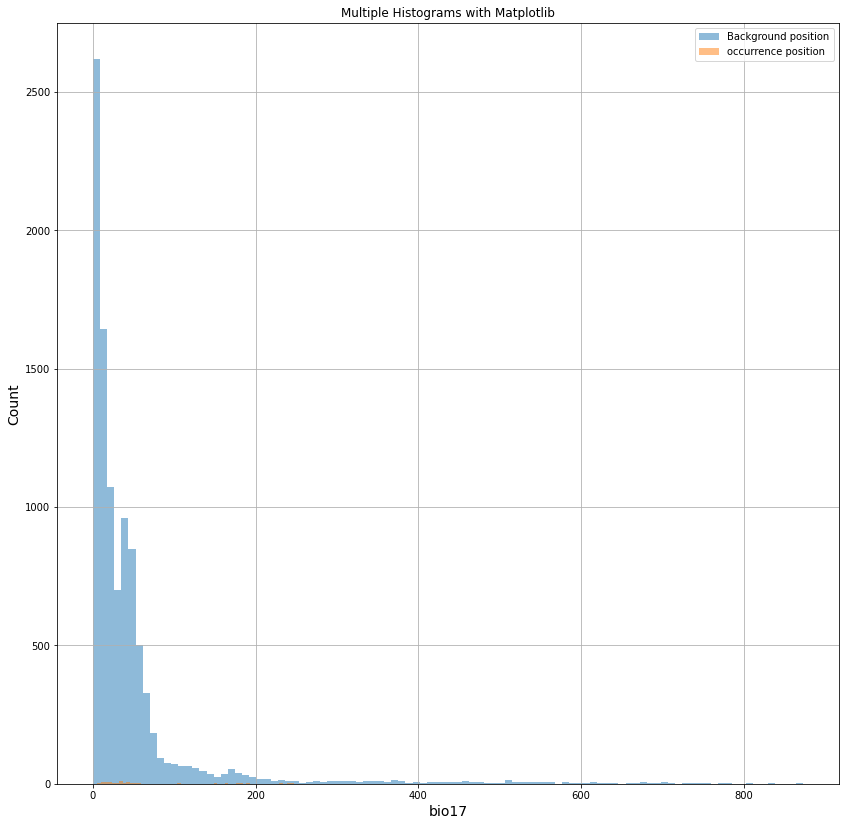

 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:26<00:02,  1.48s/it]

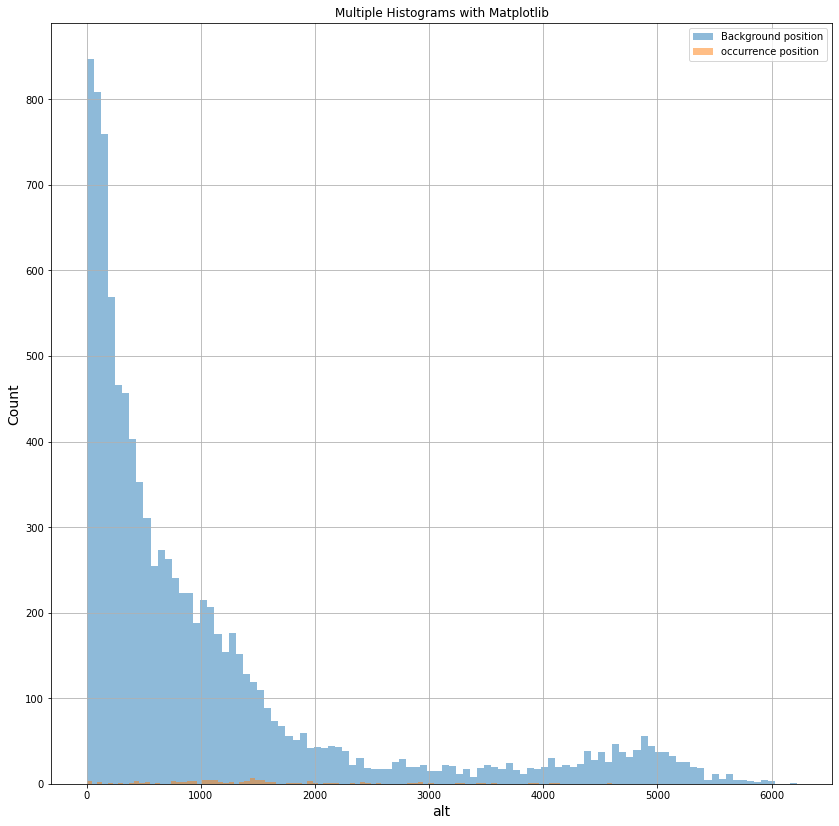

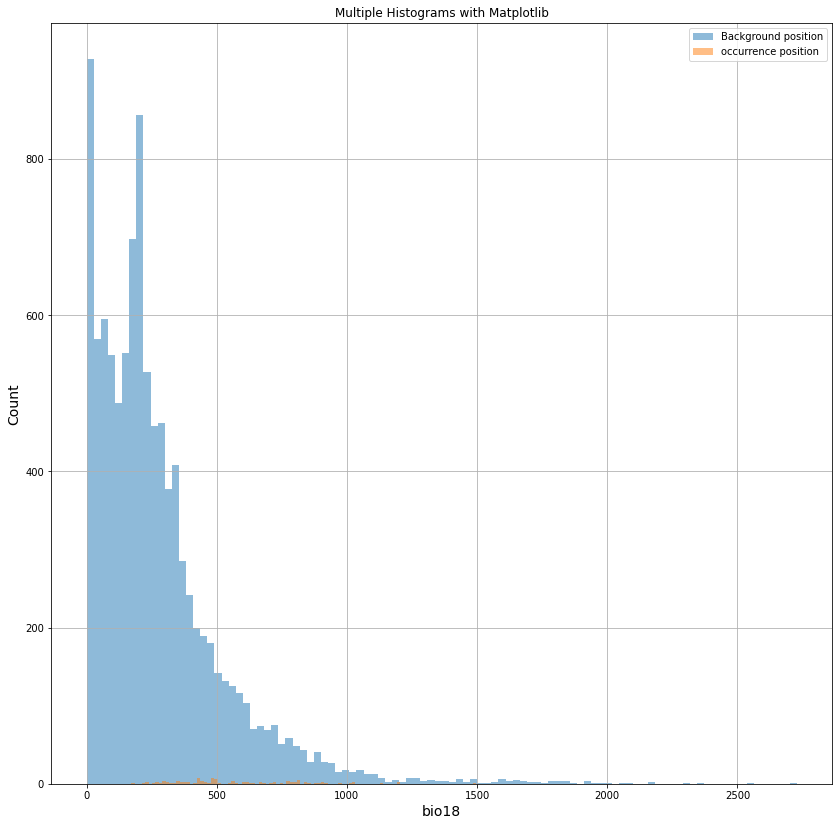

 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:28<00:01,  1.42s/it]

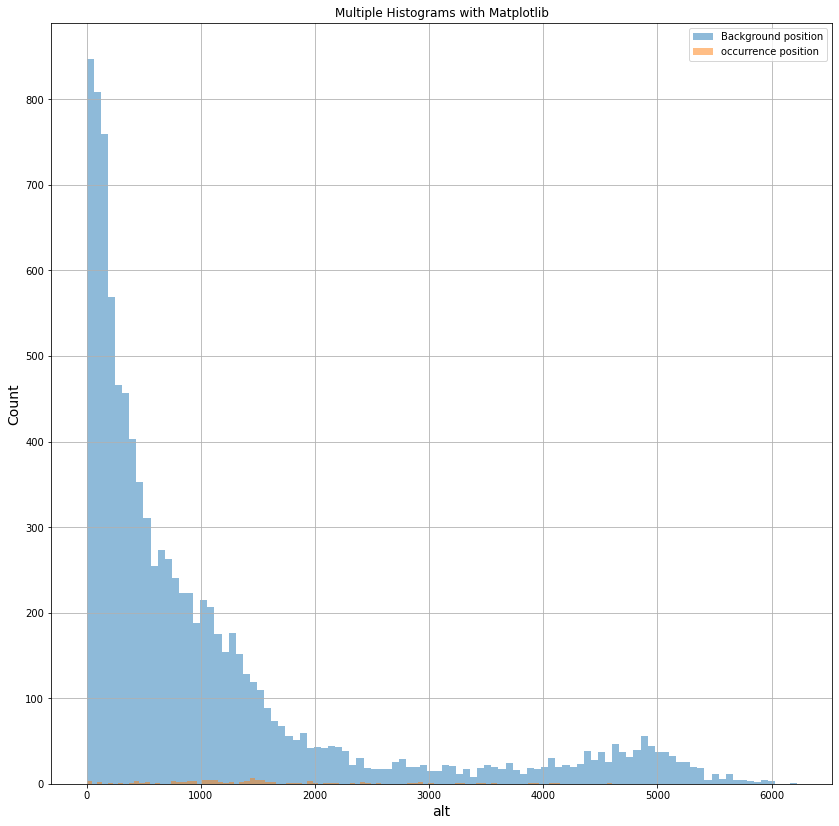

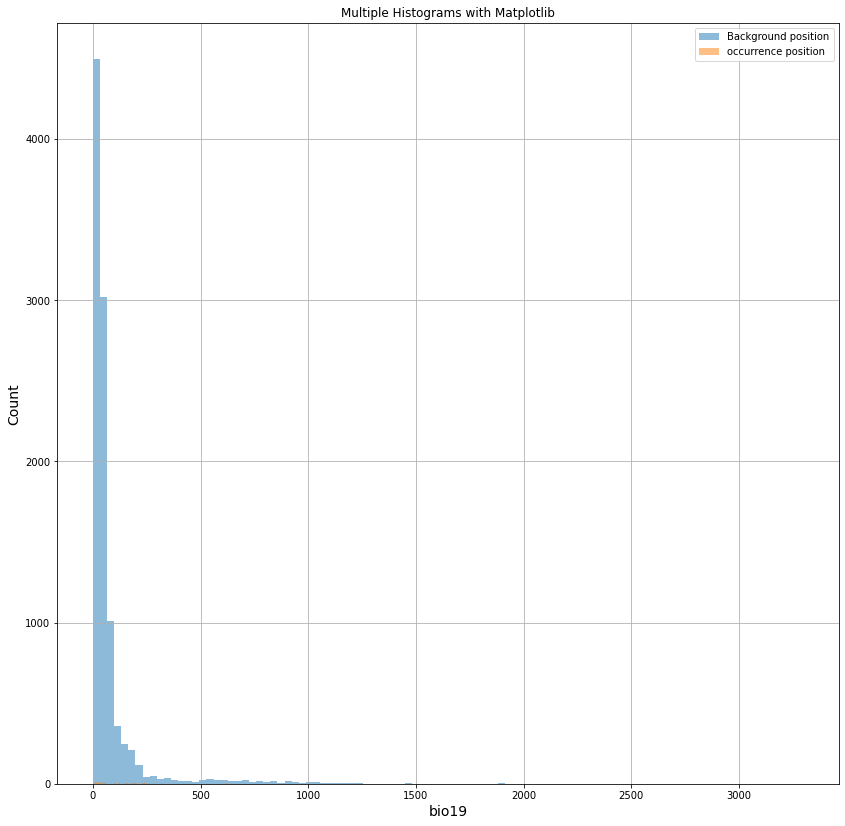

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:29<00:00,  1.55s/it]

29.50848937034607초 걸렸습니다.


In [419]:
occ = all_bio.iloc[:, 4:]
bg = bio_var


start = time.time()
for col in tqdm(range(len(bg.columns)-1)):
    col+=1
    if 'alt' in bg.columns:
        
        plt.hist(bg['alt'], bins=100, alpha=0.5, label="Background position")
        plt.hist(occ['alt'], bins=100, alpha=0.5, label="occurrence position")
        plt.xlabel("alt", size=14)
        plt.ylabel("Count", size=14)
        plt.title("Multiple Histograms with Matplotlib")
        plt.legend(loc='upper right')
#         plt.savefig("overlapping_histograms_with_matplotlib_Python.png")
        plt.show()
        
    plt.hist(bg['bio' + str(col)], bins=100, alpha=0.5, label="Background position")
    plt.hist(occ['bio_' + str(col)], bins=100, alpha=0.5, label="occurrence position")
    plt.xlabel('bio' + str(col), size=14)
    plt.ylabel("Count", size=14)
    plt.title("Multiple Histograms with Matplotlib")
    plt.legend(loc='upper right')
#     plt.savefig("overlapping_histograms_with_matplotlib_Python.png")
    plt.show()

    
print(f"{time.time()-start}초 걸렸습니다.")

In [420]:
all_bio

,uid,speceis,lon,lat,alt,bio_1,bio_2,bio_3,bio_4,bio_5,...,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
0,1,나도범의귀,128.924583,37.226833,1121.0,56.0,170.0,27.0,9238.0,221.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
1,2,나도범의귀,128.924444,37.226944,1121.0,56.0,170.0,27.0,9238.0,221.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
2,3,나도범의귀,127.280000,42.340000,429.0,41.0,201.0,25.0,13436.0,267.0,...,201.0,-148.0,746.0,185.0,8.0,92.0,460.0,30.0,460.0,30.0
3,4,나도범의귀,128.510000,42.780000,944.0,12.0,166.0,26.0,12574.0,232.0,...,166.0,-159.0,685.0,158.0,7.0,93.0,426.0,23.0,426.0,23.0
4,5,나도범의귀,121.820000,48.770000,782.0,-13.0,157.0,24.0,13790.0,232.0,...,157.0,-198.0,489.0,148.0,3.0,115.0,344.0,11.0,344.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,장백제비꽃,89.562264,52.366926,1488.0,-33.0,127.0,24.0,12842.0,203.0,...,127.0,-204.0,472.0,83.0,13.0,61.0,225.0,40.0,225.0,46.0
101,102,장백제비꽃,92.883386,52.649883,1148.0,-40.0,138.0,23.0,14839.0,219.0,...,138.0,-243.0,874.0,139.0,27.0,49.0,365.0,93.0,365.0,97.0
108,109,장백제비꽃,134.145070,43.678347,944.0,5.0,139.0,21.0,11186.0,199.0,...,139.0,-149.0,914.0,165.0,20.0,64.0,433.0,69.0,433.0,69.0
109,110,장백제비꽃,128.332361,38.138872,1216.0,42.0,164.0,27.0,9796.0,216.0,...,164.0,-89.0,1583.0,351.0,38.0,81.0,888.0,120.0,859.0,120.0


In [448]:
bio_var.columns = ['alt', 'bio_1', 'bio_2', 'bio_3', 'bio_4', 'bio_5', 'bio_6', 'bio_7', 'bio_8', 'bio_9', 'bio_10', 'bio_11', 'bio_12', 'bio_13', 'bio_14', 'bio_15', 'bio_16', 'bio_17', 'bio_18', 'bio_19'] 
bio_var.head()

,alt,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
0,918.0,108.0,247.0,27.0,12015.0,322.0,-138.0,460.0,247.0,-43.0,247.0,-62.0,67.0,15.0,1.0,83.0,40.0,4.0,40.0,4.0
1,52.0,152.0,267.0,24.0,9154.0,317.0,-18.0,335.0,267.0,33.0,267.0,33.0,979.0,204.0,30.0,61.0,464.0,104.0,464.0,104.0
2,24.0,264.0,306.0,42.0,4234.0,380.0,117.0,263.0,295.0,199.0,306.0,199.0,1424.0,446.0,1.0,118.0,1005.0,22.0,320.0,22.0
3,280.0,159.0,262.0,24.0,8382.0,315.0,-2.0,317.0,199.0,67.0,262.0,47.0,1669.0,287.0,47.0,54.0,748.0,167.0,594.0,205.0
4,213.0,28.0,193.0,22.0,13614.0,271.0,-210.0,481.0,193.0,-137.0,193.0,-151.0,341.0,59.0,13.0,44.0,140.0,43.0,140.0,52.0


In [460]:
if 'targe' in bio_var.columns:
    bio_var = bio_var.drop('targe', axis =1)
bio_var['target'] = 0
bio_var.head()

,alt,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,target
0,918.0,108.0,247.0,27.0,12015.0,322.0,-138.0,460.0,247.0,-43.0,...,-62.0,67.0,15.0,1.0,83.0,40.0,4.0,40.0,4.0,0
1,52.0,152.0,267.0,24.0,9154.0,317.0,-18.0,335.0,267.0,33.0,...,33.0,979.0,204.0,30.0,61.0,464.0,104.0,464.0,104.0,0
2,24.0,264.0,306.0,42.0,4234.0,380.0,117.0,263.0,295.0,199.0,...,199.0,1424.0,446.0,1.0,118.0,1005.0,22.0,320.0,22.0,0
3,280.0,159.0,262.0,24.0,8382.0,315.0,-2.0,317.0,199.0,67.0,...,47.0,1669.0,287.0,47.0,54.0,748.0,167.0,594.0,205.0,0
4,213.0,28.0,193.0,22.0,13614.0,271.0,-210.0,481.0,193.0,-137.0,...,-151.0,341.0,59.0,13.0,44.0,140.0,43.0,140.0,52.0,0


In [449]:
나도범의귀 = all_bio['speceis'] =="나도범의귀"

In [450]:
nado = all_bio[나도범의귀]

In [451]:
nado.shape

(25, 24)

In [452]:
nado.head()

,uid,speceis,lon,lat,alt,bio_1,bio_2,bio_3,bio_4,bio_5,...,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
0,1,나도범의귀,128.924583,37.226833,1121.0,56.0,170.0,27.0,9238.0,221.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
1,2,나도범의귀,128.924444,37.226944,1121.0,56.0,170.0,27.0,9238.0,221.0,...,170.0,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0
2,3,나도범의귀,127.280000,42.340000,429.0,41.0,201.0,25.0,13436.0,267.0,...,201.0,-148.0,746.0,185.0,8.0,92.0,460.0,30.0,460.0,30.0
3,4,나도범의귀,128.510000,42.780000,944.0,12.0,166.0,26.0,12574.0,232.0,...,166.0,-159.0,685.0,158.0,7.0,93.0,426.0,23.0,426.0,23.0
4,5,나도범의귀,121.820000,48.770000,782.0,-13.0,157.0,24.0,13790.0,232.0,...,157.0,-198.0,489.0,148.0,3.0,115.0,344.0,11.0,344.0,11.0


In [461]:
nado['target'] = 1

G:\Anaconda3\envs\tf1152\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [462]:
nado.head()

,uid,speceis,lon,lat,alt,bio_1,bio_2,bio_3,bio_4,bio_5,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,target
0,1,나도범의귀,128.924583,37.226833,1121.0,56.0,170.0,27.0,9238.0,221.0,...,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0,1
1,2,나도범의귀,128.924444,37.226944,1121.0,56.0,170.0,27.0,9238.0,221.0,...,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0,1
2,3,나도범의귀,127.280000,42.340000,429.0,41.0,201.0,25.0,13436.0,267.0,...,-148.0,746.0,185.0,8.0,92.0,460.0,30.0,460.0,30.0,1
3,4,나도범의귀,128.510000,42.780000,944.0,12.0,166.0,26.0,12574.0,232.0,...,-159.0,685.0,158.0,7.0,93.0,426.0,23.0,426.0,23.0,1
4,5,나도범의귀,121.820000,48.770000,782.0,-13.0,157.0,24.0,13790.0,232.0,...,-198.0,489.0,148.0,3.0,115.0,344.0,11.0,344.0,11.0,1


In [463]:
nado_all = pd.concat([nado.iloc[:, 4:], bio_var], axis=0)

In [464]:
nado_all.shape

(10025, 21)

In [465]:
nado_all.head()

,alt,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,target
0,1121.0,56.0,170.0,27.0,9238.0,221.0,-131.0,352.0,165.0,-68.0,...,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0,1
1,1121.0,56.0,170.0,27.0,9238.0,221.0,-131.0,352.0,165.0,-68.0,...,-68.0,1621.0,336.0,42.0,70.0,839.0,150.0,816.0,150.0,1
2,429.0,41.0,201.0,25.0,13436.0,267.0,-248.0,515.0,201.0,-148.0,...,-148.0,746.0,185.0,8.0,92.0,460.0,30.0,460.0,30.0,1
3,944.0,12.0,166.0,26.0,12574.0,232.0,-246.0,478.0,166.0,-159.0,...,-159.0,685.0,158.0,7.0,93.0,426.0,23.0,426.0,23.0,1
4,782.0,-13.0,157.0,24.0,13790.0,232.0,-263.0,495.0,157.0,-168.0,...,-198.0,489.0,148.0,3.0,115.0,344.0,11.0,344.0,11.0,1


In [466]:
nado_all.tail()

,alt,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,target
9995,2746.0,40.0,145.0,37.0,8964.0,223.0,-192.0,415.0,145.0,-83.0,...,-83.0,337.0,72.0,1.0,92.0,196.0,5.0,196.0,5.0,0
9996,153.0,8.0,175.0,22.0,13435.0,256.0,-224.0,480.0,175.0,-149.0,...,-168.0,376.0,60.0,12.0,46.0,159.0,44.0,159.0,51.0,0
9997,302.0,175.0,296.0,34.0,9331.0,388.0,-12.0,400.0,74.0,296.0,...,54.0,167.0,42.0,0.0,98.0,97.0,0.0,0.0,77.0,0
9998,776.0,148.0,262.0,35.0,8898.0,360.0,-33.0,393.0,96.0,262.0,...,31.0,316.0,69.0,0.0,91.0,185.0,0.0,0.0,113.0,0
9999,186.0,258.0,262.0,92.0,315.0,315.0,202.0,113.0,254.0,257.0,...,254.0,3302.0,361.0,162.0,24.0,1056.0,555.0,871.0,837.0,0


# XGBOOST 알고리즘 이용한 종분포모델

In [467]:
import xgboost
print(xgboost.__version__)

1.2.1


In [488]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [471]:
X_feature = nado_all.iloc[:, :-1]
y_label = nado_all.iloc[:, -1]

In [475]:
X_feature.head()
X_feature.shape

(10025, 20)

In [476]:
y_label.shape

(10025,)

In [477]:
y_label.value_counts()

0    10000
1       25
Name: target, dtype: int64

In [478]:
10000/10025 * 100

99.75062344139651

In [479]:
dtrain = xgb.DMatrix(data=X_feature, label = y_label)

In [482]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
    
}
num_rounds = 400

In [485]:
wlist =[(dtrain, 'train')]
xgb_model =xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.59912
[1]	train-logloss:0.52211
[2]	train-logloss:0.45792
[3]	train-logloss:0.40367
[4]	train-logloss:0.35736
[5]	train-logloss:0.31750
[6]	train-logloss:0.28294
[7]	train-logloss:0.25283
[8]	train-logloss:0.22647
[9]	train-logloss:0.20331
[10]	train-logloss:0.18233
[11]	train-logloss:0.16379
[12]	train-logloss:0.14735
[13]	train-logloss:0.13274
[14]	train-logloss:0.11973
[15]	train-logloss:0.10811
[16]	train-logloss:0.09774
[17]	train-logloss:0.08846
[18]	train-logloss:0.08014
[19]	train-logloss:0.07269
[20]	train-logloss:0.06599
[21]	train-logloss:0.05997
[22]	train-logloss:0.05456
[23]	train-logloss:0.04968
[24]	train-logloss:0.04530
[25]	train-logloss:0.04135
[26]	train-logloss:0.03778
[27]	train-logloss:0.03457
[28]	train-logloss:0.03166
[29]	train-logloss:0.02904
[30]	train-logloss:0.02667
[31]	train-logloss:0.02453
[32]	train-logloss:0.02260
[33]	train-logloss:0.02084
[34]	train-logloss:0.01925
[35]	train-logloss:0.01781
[36]	train-logloss:0.01651
[37]	train-

[297]	train-logloss:0.00051
[298]	train-logloss:0.00051
[299]	train-logloss:0.00051
[300]	train-logloss:0.00051
[301]	train-logloss:0.00051
[302]	train-logloss:0.00051
[303]	train-logloss:0.00051
[304]	train-logloss:0.00050
[305]	train-logloss:0.00050
[306]	train-logloss:0.00050
[307]	train-logloss:0.00050
[308]	train-logloss:0.00050
[309]	train-logloss:0.00050
[310]	train-logloss:0.00050
[311]	train-logloss:0.00050
[312]	train-logloss:0.00050
[313]	train-logloss:0.00049
[314]	train-logloss:0.00049
[315]	train-logloss:0.00049
[316]	train-logloss:0.00049
[317]	train-logloss:0.00049
[318]	train-logloss:0.00049
[319]	train-logloss:0.00049
[320]	train-logloss:0.00049
[321]	train-logloss:0.00049
[322]	train-logloss:0.00048
[323]	train-logloss:0.00048
[324]	train-logloss:0.00048
[325]	train-logloss:0.00048
[326]	train-logloss:0.00048
[327]	train-logloss:0.00048
[328]	train-logloss:0.00048
[329]	train-logloss:0.00047
[330]	train-logloss:0.00047
[331]	train-logloss:0.00047
[332]	train-logloss:

In [486]:
pred_probs = xgb_model.predict(dtrain)

In [504]:
np.round(pred_probs[:10], 3)
preds = [1 if x > 0.8 else 0 for x in pred_probs]

In [505]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [506]:
get_clf_eval(y_label, preds, pred_probs)

오차 행렬
[[10000     0]
 [    2    23]]
정확도: 0.9998, 정밀도: 1.0000, 재현율: 0.9200,    F1: 0.9583, AUC:1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

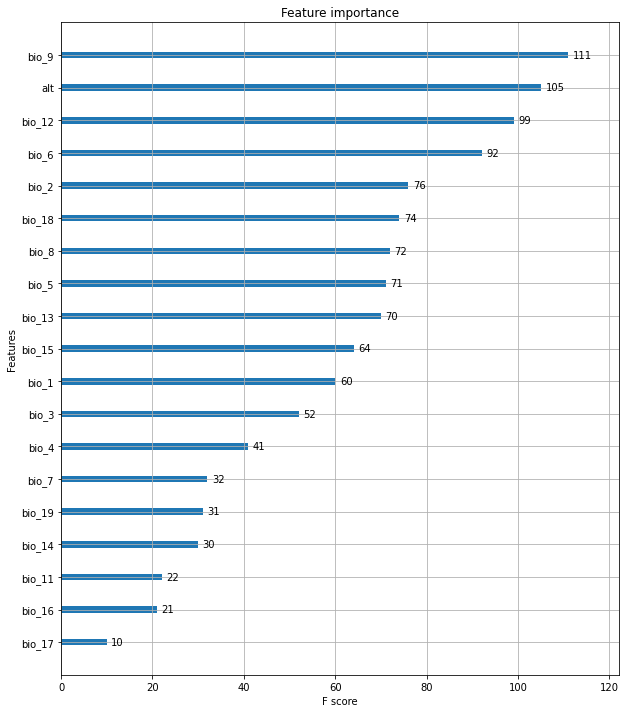

In [507]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax);

## 과제
- 이제 bio주제도를 불러와서 예측 분포지도를 생성하기

In [ ]:
# pred_probs = xgb_model.predict(dtrain)